# ***Quora Question Pair Simiarity Detection***
Impleting with:
- all basic features
- nlp features
- fuzzy features
- converting word to vector using Google News Vector
- word mover distance and normalized word mover distance
- distance vectors like cosine, euclidean, minkowski calculated from q1 and q2 vectors after converting the sentences into vectors
- tfidf vectorization of q1 and q2 separately
- Cross Validation and check which ML models are performing best
- Applying those ML models to measure the performance of our model.

# ***CONNECT TO austin.austin.photos@gmail.com account coz all intermediate codes are saved to that accounts Google Drive***

# ***0.1 dependency installs***

In [ ]:
!pip install kaggle

# ***0.2 upload the kaggle credential***

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sudipta1997","key":"25c1b4d4da01aa7ef6db29242c02a25e"}'}

# ***0.3 is it there***

In [ ]:
ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jun  3 16:18 kaggle.json


# ***0.4 File configuration***

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# ***0.5 downloading the dataset***

In [ ]:
!kaggle competitions download -c quora-question-pairs

 61% 3.00M/4.95M [00:00<00:00, 23.3MB/s]
100% 4.95M/4.95M [00:00<00:00, 31.8MB/s]
 80% 17.0M/21.2M [00:00<00:00, 55.5MB/s]
100% 21.2M/21.2M [00:00<00:00, 84.0MB/s]
 92% 105M/114M [00:01<00:00, 88.2MB/s] 
100% 114M/114M [00:01<00:00, 112MB/s] 
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


# ***0.6 unzip***

In [ ]:
!ls
!unzip train.csv.zip
!unzip test.csv.zip

kaggle.json  sample_submission.csv.zip	train.csv.zip
sample_data  test.csv.zip
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  test.csv.zip
  inflating: test.csv                


# ***0.7 Importing Drive and Mounting Drive to Access Data***

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# ***0.8 Install Required Libraries***

In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install nltk
!pip install tqdm
!pip install keras
!pip install tensorflow
!pip install pyemd
!pip install fuzzywuzzy
!pip install python-levenshtein
!pip install --upgrade gensim
!pip install Distance

     |████████████████████████████████| 51kB 1.8MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144793 sha256=06abea54f298c4b628293062b1e4370885e80c53e33dc489e2fcfe3ca5d07a96
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein
     |████████████████████████████████| 24.2MB 6.0MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 184kB 3.5MB/s 
  Created wheel for Distance: filename=Distance-0.1.3-cp36-none-any.whl size=16261 sha256=c8e7e83ca98c13080e488baf1f76680d1b85237daf60d84fc1cfa2ebb34a43dd
  Stored in directory: /root/.cache/pip/wheels/d5/aa/e1/dbba9e7b6d397d645d0f12db1c66dbae9c5442b39b001db18e
Successfully built Distance


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# ***0.9 Import necessary Libraries at the beginning***

In [ ]:
%%time
import pickle as cPickle
import pandas as pd
import numpy as np
import gensim
import distance
import re
import matplotlib.pyplot as plt
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
import spacy
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from fuzzywuzzy import fuzz
from nltk.corpus import stopwords
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
stop_words = stopwords.words('english')

CPU times: user 487 ms, sys: 79.4 ms, total: 566 ms
Wall time: 1.21 s


# ***1. Reading the Data***

In [ ]:
data = pd.read_csv('train.csv')
data.info()
#data = data.drop(['id', 'qid1', 'qid2'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
data.head(8)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1


We are given a minimal number of data fields here, consisting of:

1.   id: Looks like a simple rowID
2.   qid{1,2}: The unique ID of each quesrion in the pair
3.   question{1,2}: The actual textual contents of the questions
4.   is_duplicate: The label that we are trying to predict - whether the two questions are duplicates of each other.


# ***2. Analysis of Data***

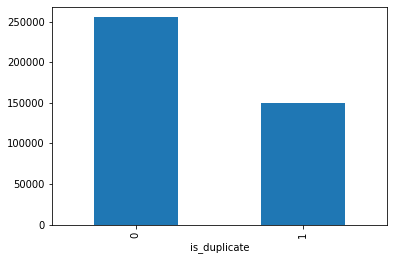

In [ ]:
data.groupby("is_duplicate")['id'].count().plot.bar()

In [ ]:
print("Total number of question pairs in dataset:\n   {}".format(len(data)))

Total number of question pairs in dataset:
   404290


# ***2.1 Amount of Similar and Non-similar Question Pairs***

In [ ]:
print("Amount of Question pairs are not Similar (is_duplicate = 0):   {}%\n\n".format(100 - round(data['is_duplicate'].mean()*100, 2)))
print("Amount of Question pairs are Similar (is_duplicate = 1):   {}%".format(round(data['is_duplicate'].mean()*100, 2)))

Amount of Question pairs are not Similar (is_duplicate = 0):   63.08%


Amount of Question pairs are Similar (is_duplicate = 1):   36.92%


## *SO, we have 40% positive samples.*

## *Our distribution is almost 60/40. So we can consider it almost balanced.*

# ***2.2 Number of unique questions***

In [ ]:
qids = pd.Series(data['qid1'].tolist() + data['qid2'].tolist())
unique_ques = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions in the dataset are: {}\n'.format(unique_ques))

print ('Number of unique questions that appear more than one time in the dataset are: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_ques*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions in the dataset are: 537933

Number of unique questions that appear more than one time in the dataset are: 111780 (20.77953945937505%)

Max number of times a single question is repeated: 157



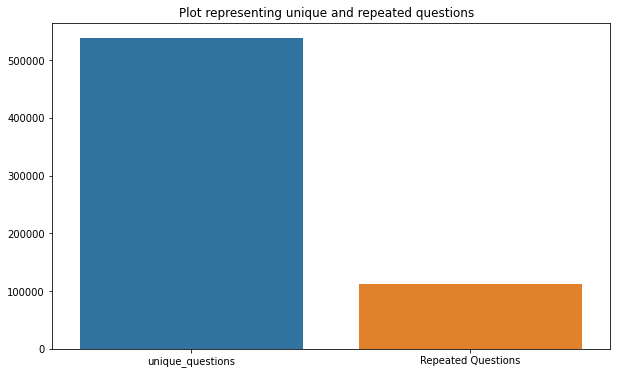

In [ ]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_ques , qs_morethan_onetime]

plt.figure(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

# ***2.3 Checking for Duplicates***

In [ ]:
#checking whether there are any repeated pair of questions

Q_pair_duplicates = data[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate question pairs: ",(Q_pair_duplicates).shape[0] - data.shape[0])

Number of duplicate question pairs:  0


# ***2.4 Number of occurrences of each question***

Maximum number of times a single question is repeated in dataset: 157




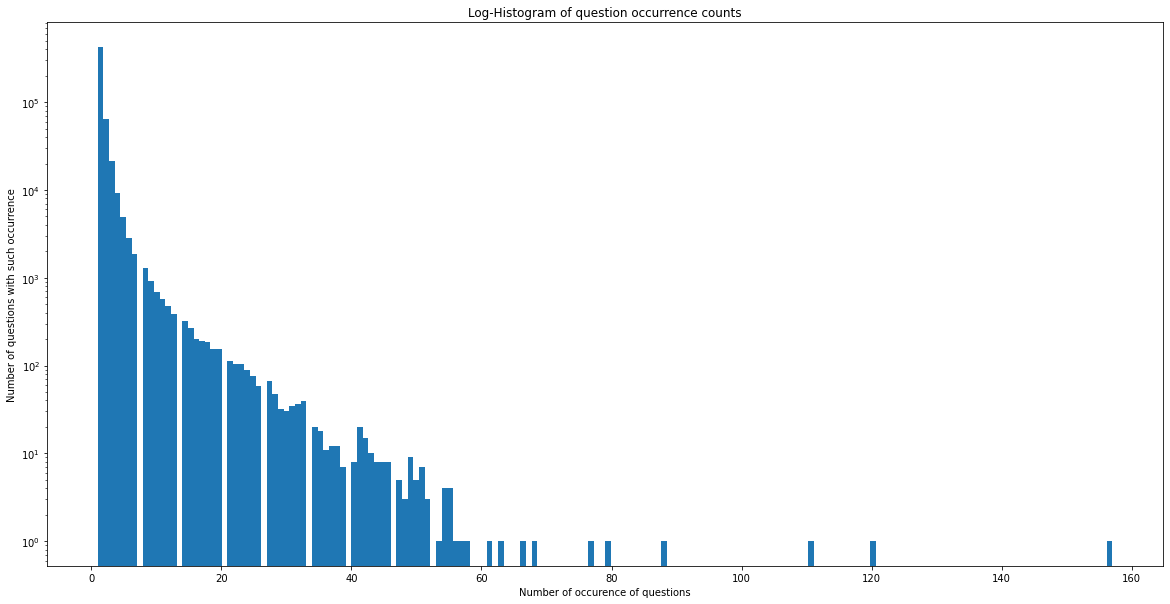

In [ ]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=180)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question occurrence counts')

plt.xlabel('Number of occurence of questions')

plt.ylabel('Number of questions with such occurrence')

print ('Maximum number of times a single question is repeated in dataset: {}\n\n'.format(max(qids.value_counts())))

# ***3 Checking for NULL values and fixing if found***

In [ ]:
#Checking whether there are any rows with null values
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

            id  ...  is_duplicate
105780  105780  ...             0
201841  201841  ...             0
363362  363362  ...             0

[3 rows x 6 columns]


In [ ]:
# Filling the null values with ' '
data = data.fillna('')
nan_rows = data[data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


# ***4. Splitting the dataset into Train Test and Separating X and y from both train and test dataset***

In [ ]:
y_true = data['is_duplicate']
y_true = list(map(int, y_true.values))
y = pd.DataFrame(y_true, index= data.index)

In [ ]:
y.head(8)

,0
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,1


In [ ]:
# X = data[['id','qid1','qid2','question1','question2']]
X = data # is_duplicate column will be dropped later
X.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=13)

In [ ]:
X_train_hold = X_train
X_test_hold = X_test

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283003 entries, 12053 to 241105
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            283003 non-null  int64 
 1   qid1          283003 non-null  int64 
 2   qid2          283003 non-null  int64 
 3   question1     283003 non-null  object
 4   question2     283003 non-null  object
 5   is_duplicate  283003 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.1+ MB


In [ ]:
X_train.head()

,id,qid1,qid2,question1,question2,is_duplicate
12053,12053,23252,23253,What are the most convenient flights between L...,Are there any non-stop flights between Leeds a...,1
85769,85769,144750,144751,Why do I want to join the Air Force?,I want to be a Fighter Jet pilot in the US mil...,0
59092,59092,13756,69108,How can I improve English speaking skill?,How can I improve my speaking?,1
159855,159855,249462,249463,What are some of the best places to visit in N...,What are good places to visit in New York?,1
377999,377999,67800,154703,What are some ways to get rich?,How do I become rich?,1


In [ ]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283003 entries, 12053 to 241105
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       283003 non-null  int64
dtypes: int64(1)
memory usage: 4.3 MB


In [ ]:
y_train.head()

,0
12053,1
85769,0
59092,1
159855,1
377999,1


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121287 entries, 194388 to 147218
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            121287 non-null  int64 
 1   qid1          121287 non-null  int64 
 2   qid2          121287 non-null  int64 
 3   question1     121287 non-null  object
 4   question2     121287 non-null  object
 5   is_duplicate  121287 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 6.5+ MB


In [ ]:
X_test.head()

,id,qid1,qid2,question1,question2,is_duplicate
194388,194388,294590,294591,Can chain license be used to drive in Dubai?,Can bahrain license be used to drive in Dubai?,0
273277,273277,391720,391721,I am an engineering graduate considering MBA s...,"How much excellent gmat, gre and csat scores a...",0
288986,288986,21831,373433,What are the qualities of a good software deve...,How can I make a good software developer?,1
112479,112479,184033,184034,How can I become less self conscious and insec...,How do you become less insecure?,0
129754,129754,208366,208367,What is the best way to get rid of a 2-3 week ...,How do I get rid of a cough and a cold?,0


In [ ]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121287 entries, 194388 to 147218
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       121287 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [ ]:
y_test.head()

,0
194388,0
273277,0
288986,1
112479,0
129754,0


# ***5 Defining a function for Preprocessing of Text***


- Preprocessing:
    - 5.1 Removing html tags like 'title', 'body' etc.
    - 5.2 Removing Punctuations ',', '.', '(' etc.
    - 5.3 Removing Stopwords like  ‘are’, ‘we’, ‘these’, ‘your'
    - 5.4 Performing stemming with PorterStemmer
    - 5.5 Expanding contractions "000" -> "k" etc.

In [ ]:
SAFE_DIV = 0.0001 

stop_words = stopwords.words("english")

def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter  =  PorterStemmer()
    pattern  =  re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x

# ***6. Description of Basic features***

 - ____frequency_qid1____ = Frequency of qid1's
 - ____frequency_qid2____ = Frequency of qid2's 
 - ____q1_length____ = Length of q1
 - ____q2len____ = Length of q2
 - ____q1_count_words____ = Number of words in Question 1
 - ____q2_count_words____ = Number of words in Question 2
 - ____word_Common_count____ = (Number of common unique words in Question 1 and Question 2)
 - ____word_Total_count___ =(Total num of words in Question 1 + Total num of words in Question 2)
 - ____word_share____ = (word_common_count)/(word_Total_count)
 - ____frequency_q1+frequency_q2____ = sum of frequency of qid1 and qid2 
 - ____frequency_q1-frequency_q2____ = absolute difference of frequency of qid1 and qid2 

# ***7. Description of NLP and Fuzzy Features***

Definition:
- __Token__: Token is obtained by splitting sentence according to space
- __Stop_Word__ : stop words as per NLTK.
- __Word__ : A token that is not a stop_word


Features:
- __common_word_count_minimum__ :  Ratio of common_word_count to min lenghth of word count of Q1 and Q2 <br>cwc_min = common_word_count / (min(len(q1_words), len(q2_words))
<br>
<br>
- __common_word_count_maximum__ :  Ratio of common_word_count to max lenghth of word count of Q1 and Q2 <br>cwc_max = common_word_count / (max(len(q1_words), len(q2_words))
<br>
<br>
- __common_stop_count_minimum__ :  Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 <br> csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops))
<br>
<br>
- __common_stop_count_maximum__ :  Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2<br>csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops))
<br>
<br>
- __common_token_count_minimum__ :  Ratio of common_token_count to min lenghth of token count of Q1 and Q2<br>ctc_min = common_token_count / (min(len(ques1_tokens), len(ques2_tokens))
<br>
<br>

- __common_token_count_maximum__ :  Ratio of common_token_count to max lenghth of token count of Q1 and Q2<br>ctc_max = common_token_count / (max(len(ques1_tokens), len(ques2_tokens))
<br>
<br>
        
- __last_word_equivalent__ :  Check if Last word of both questions is equal or not<br>last_word_eq = int(ques1_tokens[-1] == ques2_tokens[-1])
<br>
<br>

- __first_word_equivalent__ :  Check if First word of both questions is equal or not<br>first_word_eq = int(ques1_tokens[0] == ques2_tokens[0])
<br>
<br>
        
- __absolute_length_difference__ :  Abs. length difference<br>abs_len_diff = abs(len(ques1_tokens) - len(ques2_tokens))
<br>
<br>

- __mean_length__ :  Average Token Length of both Questions<br>mean_len = (len(ques1_tokens) + len(ques2_tokens))/2
<br>
<br>


- __fuzz_ratio__ 
<br>
<br>

- __fuzz_partial_ratio__ 
<br>
<br>


- __token_sort_ratio__ 
<br>
<br>

- __token_set_ratio__ 
<br>
<br>

- Links to fuzzy features
- https://github.com/seatgeek/fuzzywuzzy#usage
- http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/


- __longest_substring_ratio__ :  Ratio of length longest common substring to min lenghth of token count of Q1 and Q2<br>longest_substr_ratio = len(longest common substring) / (min(len(ques1_tokens), len(ques2_tokens))


# ***8. Defining Function for calculating different basic features and fuzzy features***

In [ ]:
def get_token_features(ques1, ques2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    ques1_tokens = ques1.split()
    ques2_tokens = ques2.split()

    if len(ques1_tokens) == 0 or len(ques2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    ques1_words = set([word for word in ques1_tokens if word not in stop_words])
    ques2_words = set([word for word in ques2_tokens if word not in stop_words])
    
    #Get the stopwords in Questions
    ques1_stops = set([word for word in ques1_tokens if word in stop_words])
    ques2_stops = set([word for word in ques2_tokens if word in stop_words])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(ques1_words.intersection(ques2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(ques1_stops.intersection(ques2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(ques1_tokens).intersection(set(ques2_tokens)))
    
    
    token_features[0] = common_word_count / (max(len(ques1_words), len(ques2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (min(len(ques1_words), len(ques2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (max(len(ques1_stops), len(ques2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (min(len(ques1_stops), len(ques2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (max(len(ques1_tokens), len(ques2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (min(len(ques1_tokens), len(ques2_tokens)) + SAFE_DIV)
    
    # 1st word of question pairs is same or not
    token_features[6] = int(ques1_tokens[0] == ques2_tokens[0])
    
    # Last word of question pairs is same or not
    token_features[7] = int(ques1_tokens[-1] == ques2_tokens[-1])
    
    token_features[8] = abs(len(ques1_tokens) - len(ques2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(ques1_tokens) + len(ques2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(x, y):
    strs = list(distance.lcsubstrings(x, y))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(x), len(y)) + 1)

def extract_features(data):
    # preprocessing each question
    data["question1"] = data["question1"].fillna("").apply(preprocess)
    data["question2"] = data["question2"].fillna("").apply(preprocess)

    # Merging Features with dataset
    
    token_features = data.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    data["cwc_max"]       = list(map(lambda x: x[0], token_features))
    data["cwc_min"]       = list(map(lambda x: x[1], token_features))
    data["csc_max"]       = list(map(lambda x: x[2], token_features))
    data["csc_min"]       = list(map(lambda x: x[3], token_features))
    data["ctc_max"]       = list(map(lambda x: x[4], token_features))
    data["ctc_min"]       = list(map(lambda x: x[5], token_features))
    data["first_word_eq"]  = list(map(lambda x: x[6], token_features))
    data["last_word_eq"] = list(map(lambda x: x[7], token_features))
    data["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    data["mean_len"]      = list(map(lambda x: x[9], token_features))


# ***9. Calculating Features***

In [ ]:
#11 MINUTES TO EXECUTE
X_train['freq_qid1'] = X_train.groupby('qid1')['qid1'].transform('count') 
X_train['freq_qid2'] = X_train.groupby('qid2')['qid2'].transform('count') 
X_train['freq_q1+q2'] = X_train['freq_qid1']+X_train['freq_qid2']
X_train['freq_q1-q2'] = abs(X_train['freq_qid1']-X_train['freq_qid2'])
X_train['len_q1'] = X_train.question1.apply(lambda x: len(str(x)))
X_train['len_q2'] = X_train.question2.apply(lambda x: len(str(x)))
X_train['diff_len'] = X_train.len_q1 - X_train.len_q2
X_train['len_char_q1'] = X_train.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
X_train['len_char_q2'] = X_train.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
X_train['len_word_q1'] = X_train.question1.apply(lambda x: len(str(x).split()))
X_train['len_word_q2'] = X_train.question2.apply(lambda x: len(str(x).split()))
X_train['common_words'] = X_train.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

def word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * (len(w1) + len(w2))
X_train['total_words'] = X_train.apply(word_Total, axis=1)

def word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

X_train['words_share'] = X_train.apply(word_share, axis=1)
X_train['fuzz_qratio'] = X_train.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_WRatio'] = X_train.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_partial_ratio'] = X_train.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_partial_token_set_ratio'] = X_train.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_partial_token_sort_ratio'] = X_train.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_token_set_ratio'] = X_train.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_train['fuzz_token_sort_ratio'] = X_train.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

X_train["longest_substr_ratio"]  = X_train.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
#X_train = 
extract_features(X_train)


In [ ]:
X_train.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len
12053,12053,23252,23253,what are the most convenient flights between l...,are there any non stop flights between leeds a...,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0
85769,85769,144750,144751,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5
59092,59092,13756,69108,how can i improve english speaking skill,how can i improve my speaking,1,10,17,27,7,41,30,11,20,18,7,6,4,13.0,0.307692,78,90,77,100,83,95,78,0.580645,0.499988,0.999950,0.749981,0.999967,0.714276,0.833319,1.0,0.0,1.0,6.5


# ***10. Analysis of some Basic Features***

# ***10.1 Feature: violin plot and pdf between word_share and is_duplicate***

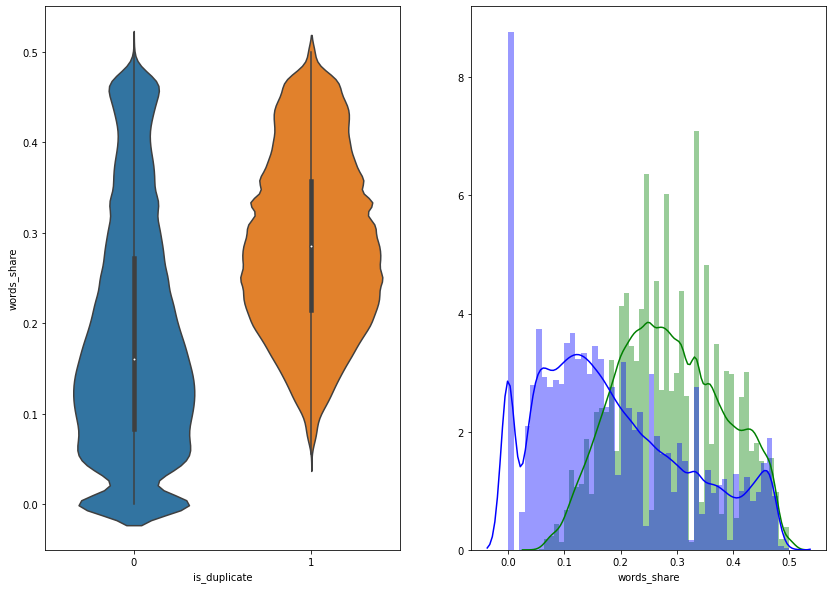

In [ ]:
plt.figure(figsize=(14, 10))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'words_share', data = X_train[0:])

plt.subplot(1,2,2)
sns.distplot(X_train[X_train['is_duplicate'] == 1.0]['words_share'][0:] , label = "1", color = 'green')
sns.distplot(X_train[X_train['is_duplicate'] == 0.0]['words_share'][0:] , label = "0" , color = 'blue' )
plt.show()

- The distributions for normalized word_share have some overlap on the far right-hand side, i.e., there are quite a lot of questions with high word similarity
- In case of violin plots, the 25th percentile of is_duplicate=1 just starts somewhat above from the 50th percentile of is_duplicate=0. So, they are not fully separable but partially separable with the feature 'word_share' alone

- The average word share and Common no. of words of qid1 and qid2 is more when they are duplicate(Similar)

# ***10.2 Feature: violin plot and pdf between word_Common and is_duplicate***

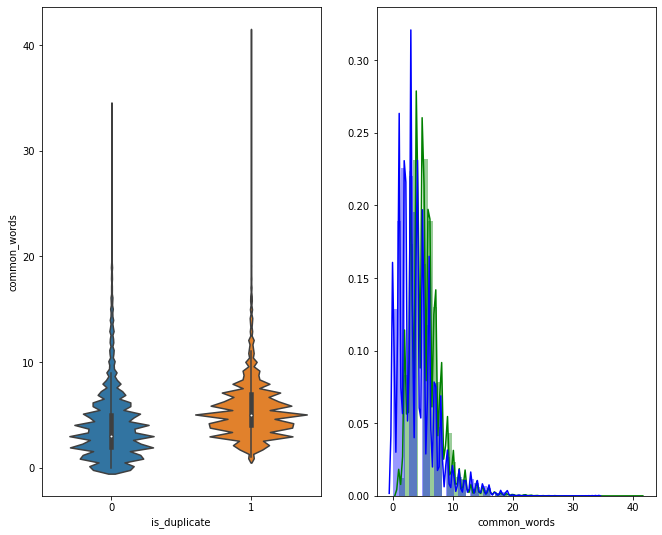

In [ ]:
plt.figure(figsize=(11, 9))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'common_words', data = X_train[0:])

plt.subplot(1,2,2)
sns.distplot(X_train[X_train['is_duplicate'] == 1.0]['common_words'][0:] , label = "1", color = 'green')
sns.distplot(X_train[X_train['is_duplicate'] == 0.0]['common_words'][0:] , label = "0" , color = 'blue' )
plt.show()

<p> The distributions of the word_Common feature in similar and non-similar questions are highly overlapping. Hence it is almost impossible to distinguish b/w duplicate and non_duplicate with the feature 'word_common' alone. </p>

# ***11. Analysis of fuzzy features***

# ***11.1 Feature: violin plot and pdf between fuzz_token_sort_ratio and is_duplicate***

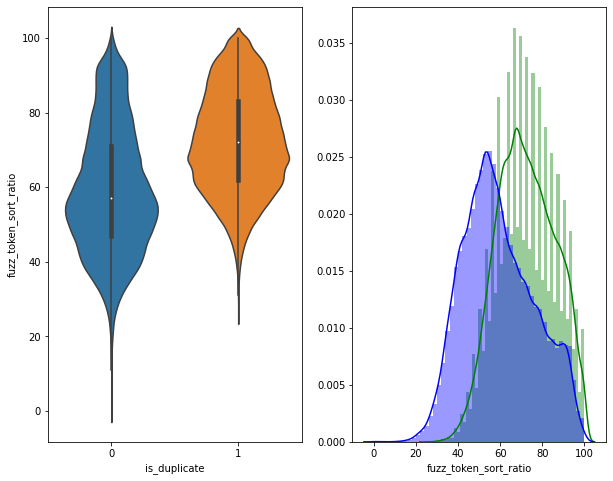

In [ ]:
# Distribution of the token_sort_ratio
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_token_sort_ratio', data = X_train[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train[X_train['is_duplicate'] == 1.0]['fuzz_token_sort_ratio'][0:] , label = "1", color = 'green')
sns.distplot(X_train[X_train['is_duplicate'] == 0.0]['fuzz_token_sort_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

# ***11.2 Feature: violin plot and pdf between fuzz_qratio and is_duplicate***

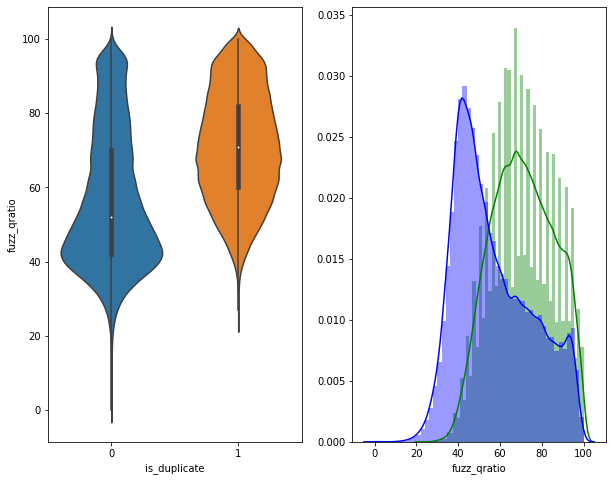

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_qratio', data = X_train[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train[X_train['is_duplicate'] == 1.0]['fuzz_qratio'][0:] , label = "1", color = 'green')
sns.distplot(X_train[X_train['is_duplicate'] == 0.0]['fuzz_qratio'][0:] , label = "0" , color = 'blue' )
plt.show()

# ***11.3 Feature: violin plot and pdf between fuzz_partial_ratio and is_dupliacte***

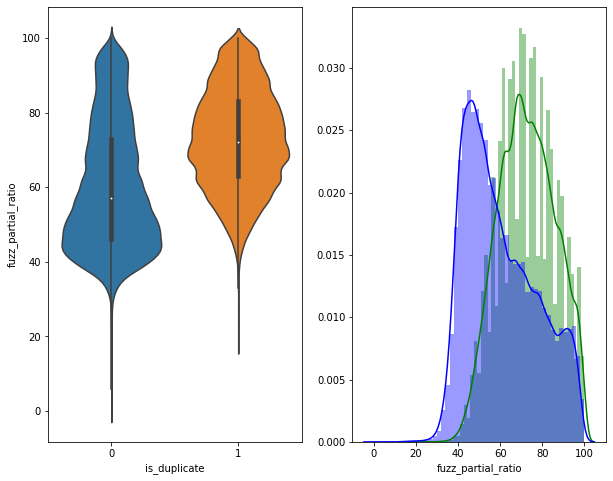

In [ ]:
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'fuzz_partial_ratio', data = X_train[0:] , )

plt.subplot(1,2,2)
sns.distplot(X_train[X_train['is_duplicate'] == 1.0]['fuzz_partial_ratio'][0:] , label = "1", color = 'green')
sns.distplot(X_train[X_train['is_duplicate'] == 0.0]['fuzz_partial_ratio'][0:] , label = "0" , color = 'blue' )
plt.show()

# ***12. Plotting a Pair Plot of diff basic and fuzzy features***

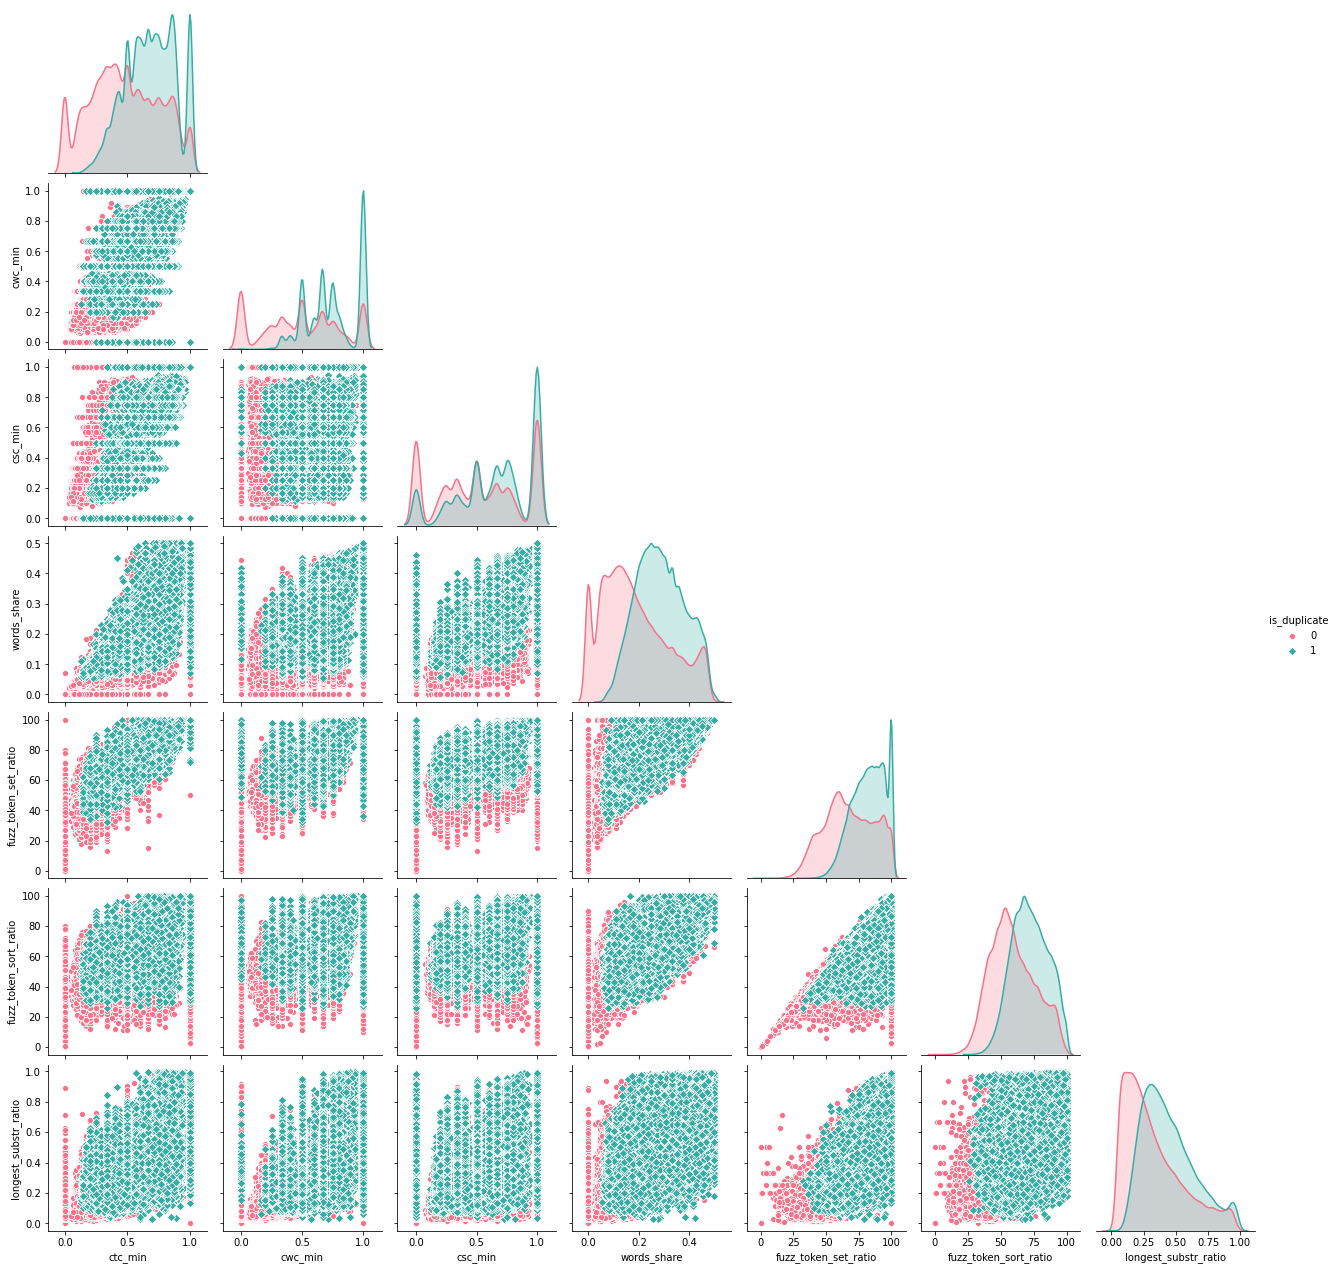

In [ ]:
import seaborn as sns
n = X_train.shape[0] #no of rows
sns.pairplot(X_train[['ctc_min', 'cwc_min', 'csc_min', 'words_share', 'fuzz_token_set_ratio','fuzz_token_sort_ratio','longest_substr_ratio', 'is_duplicate']][0:n], hue='is_duplicate', corner=True, markers=["o","D"], palette="husl",
vars=['ctc_min', 'cwc_min', 'csc_min', 'words_share', 'fuzz_token_set_ratio','fuzz_token_sort_ratio','longest_substr_ratio'])
plt.show()

# ***13. Visualization of whole data in 2 dimension using t-SNE </h3>***

In [ ]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

data_subset_sampled = X_train[0:4000]
X_data = MinMaxScaler().fit_transform(data_subset_sampled[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'fuzz_token_set_ratio' , 'fuzz_token_sort_ratio' ,  'fuzz_qratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y_data = data_subset_sampled['is_duplicate'].values

In [ ]:
tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1500,
    verbose=2,
    angle=0.5
).fit_transform(X_data)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.027s...
[t-SNE] Computed neighbors for 4000 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.151777
[t-SNE] Computed conditional probabilities in 0.241s
[t-SNE] Iteration 50: error = 78.2403107, gradient norm = 0.0587759 (50 iterations in 2.036s)
[t-SNE] Iteration 100: error = 68.7216187, gradient norm = 0.0126798 (50 iterations in 1.492s)
[t-SNE] Iteration 150: error = 67.0826263, gradient norm = 0.0094306 (50 iterations in 1.368s)
[t-SNE] Iteration 200: error = 66.4652100, gradient norm = 0.0053770 (50 iterations in 1.345s)
[t-SNE] Iteration 250: error = 66.1066589, gradient norm = 0.0043612 (50 iterations in 1.335s)
[t-SNE] KL divergence after 250 iterati

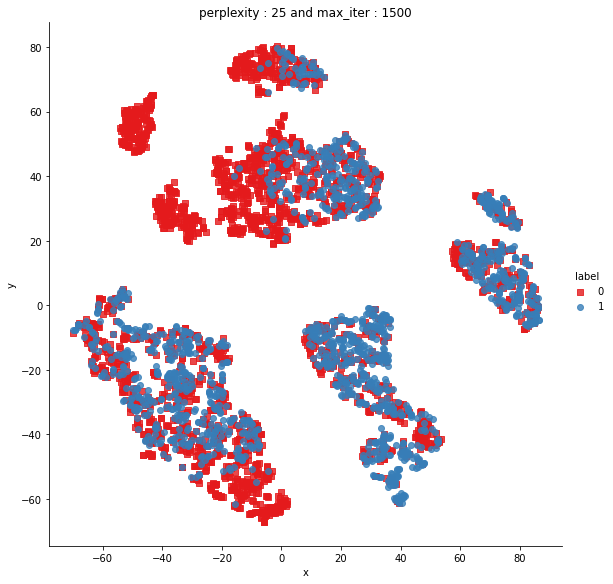

In [ ]:
df_data = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y_data})

sns.lmplot(data=df_data, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])
plt.title("perplexity : {} and max_iter : {}".format(25, 1500))
plt.show()

In [ ]:
X_train = X_train.drop(['qid1', 'qid2'], axis=1) #don't drop the 'id' column right now, it will be required while joining q1 and q2 vectors 

In [ ]:
X_train.head(2) #question1 and question2 still kept to calculate question vectors

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len
12053,12053,what are the most convenient flights between l...,are there any non stop flights between leeds a...,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0
85769,85769,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5


# ***14. Downloading GoogleNews-vectors for converting Q sentence to vectors and then calculating diff distances between them***

In [ ]:
!wget https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz

--2020-06-05 05:37:08--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.40.70
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.40.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  53.8MB/s    in 23s     

2020-06-05 05:37:31 (69.7 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



# ***15. Defining word_mover, normalized_word_mover and sentence_to_vector function***

In [ ]:
def sentence_to_vector(sen):
    words = str(sen).lower()
    words = word_tokenize(words)
    words = [xx for xx in words if not xx in stop_words]
    words = [xx for xx in words if xx.isalpha()]
    MM_arr = []
    for w in words:
        try:
            MM_arr.append(model[w])
        except:
            continue
    MM_arr = np.array(MM_arr)
    v = MM_arr.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

def word_mover_distance(sen1, sen2):
    sen2 = str(sen2).lower().split()
    sen1 = str(sen1).lower().split()
    stop_words = stopwords.words('english')
    sen2 = [w for w in sen2 if w not in stop_words]
    sen1 = [w for w in sen1 if w not in stop_words]
    return model.wmdistance(sen1, sen2)


def normalized_word_mover_distance(sen1, sen2):
    sen2 = str(sen2).lower().split()
    sen1 = str(sen1).lower().split()
    stop_words = stopwords.words('english')
    sen2 = [w for w in sen2 if w not in stop_words]
    sen1 = [w for w in sen1 if w not in stop_words]
    return norm_model.wmdistance(sen1, sen2)


# ***16. Calculating Word Mover Distance***

In [ ]:
# 8 mins to run
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
X_train['wmd'] = X_train.apply(lambda x: word_mover_distance(x['question1'], x['question2']), axis=1) #'word_mover_distance' added to data columns

In [ ]:
data_temp = X_train[['question1','question2','wmd']]
data_temp.head()

,question1,question2,wmd
12053,what are the most convenient flights between l...,are there any non stop flights between leeds a...,1.544872
85769,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,2.844249
59092,how can i improve english speaking skill,how can i improve my speaking,1.841374
159855,what are some of the best places to visit in n...,what are good places to visit in new york,0.914412
377999,what are some ways to get rich,how do i become rich,2.000067


# ***17. Calculating Normalized Word Mover Distance***

In [ ]:
# 8 mins to run, taking too much ram, better to skip this feature
#Normalizing word2vec vectors
#When using the wmdistance method, it is beneficial to normalize the word2vec vectors first, so they all have equal length. To do this, simply call model.init_sims(replace=True) and Gensim will take care of that for you.
norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
norm_model.init_sims(replace=True)
X_train['norm_wmd'] = X_train.apply(lambda x: normalized_word_mover_distance(x['question1'], x['question2']), axis=1)

In [ ]:
data_temp = X_train[['question1','question2','norm_wmd']]
data_temp.head()

,question1,question2,norm_wmd
12053,what are the most convenient flights between l...,are there any non stop flights between leeds a...,0.591685
85769,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,1.074621
59092,how can i improve english speaking skill,how can i improve my speaking,0.638455
159855,what are some of the best places to visit in n...,what are good places to visit in new york,0.380317
377999,what are some ways to get rich,how do i become rich,0.844454


# ***18. Converting Q1 and Q2 sentences into tfidf weighted vectors***

In [ ]:
'''dfd = X_train_hold #only given features
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
dfd['question1'] = dfd['question1'].apply(lambda x: str(x))
dfd['question2'] = dfd['question2'].apply(lambda x: str(x))'''

In [ ]:
'''from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts from both Question1 and Question2
questions = list(dfd['question1']) + list(dfd['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))'''

- After we find TF-IDF scores, we convert each question to a weighted average of word2vec vectors by these scores.
- TF-IDF(t) = TF(t) * IDF(t) 
- Qi = w1 w2 w3 … wn 
- TF-IDF_avg_w2Vec(Qi) = [t1*word_to_vec(w1) + t2*word_to_vec(w2) + … + tn*word_to_vec(wn)] / (t1 + t2 + t3 + … + tn), {where ti denotes tf-idf score of each word}
- Here we use a pre-trained GLOVE model which comes free with "Spacy".  https://spacy.io/usage/vectors-similarity
- It is trained on Wikipedia hence, it is stronger in terms of word semantics and similarity detection. 

In [ ]:
#import en_core_web_sm

# ***18.1 Converting Q1 sentences into tfidf weighted vector(Takes 1 hour to train)***

In [ ]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
'''nlp = spacy.load('en_core_web_sm')

vectors1 = []
for ques1 in tqdm(list(dfd['question1'])):
    docu1 = nlp(ques1) 
    mean_vector1 = np.zeros([len(docu1), len(docu1[0].vector)])
    for words1 in docu1:
        vector1 = words1.vector
        try:
            idf = word2tfidf[str(words1)]
        except:
            idf = 0
        # compute final vec
        mean_vector1 += vector1 * idf
    mean_vector1 = mean_vector1.mean(axis=0)
    vectors1.append(mean_vector1)
dfd['q1_feats_m'] = list(vectors1)

# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar'''

# ***18.2 Converting Q sentences into tfidf weighted vector(takes 1 hour to train)***

In [ ]:
'''vectors2 = []
for ques2 in tqdm(list(dfd['question2'])):
    docu2 = nlp(ques2) 
    mean_vector2 = np.zeros([len(docu2), len(docu2[0].vector)])
    for word2 in docu2:
        vector2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        mean_vector2 += vector2 * idf
    mean_vector2 = mean_vector2.mean(axis=0)
    vectors2.append(mean_vector2)
dfd['q2_vecs'] = list(vectors2)'''

# ***19. Converting question1 and question2 to vectors using Google News Vecor(Sentence to Vectors of dimension 300)***

In [ ]:
error_cnt = 0
q1_vecs = np.zeros((X_train.shape[0], 300))
for i, q in tqdm(enumerate(X_train.question1.values)):
    q1_vecs[i, :] = sentence_to_vector(q)

q2_vecs  = np.zeros((X_train.shape[0], 300))
for i, q in tqdm(enumerate(X_train.question2.values)):
    q2_vecs[i, :] = sentence_to_vector(q)

283003it [00:50, 5584.13it/s]
283003it [00:51, 5478.75it/s]


In [ ]:
q1_vecs

array([[ 0.05063381,  0.03222727, -0.00705463, ..., -0.03209164,
         0.08916842,  0.02653266],
       [ 0.04848143,  0.08090075,  0.10842977, ...,  0.02411424,
         0.04179943, -0.02478877],
       [-0.03466494, -0.01150549,  0.01985626, ..., -0.01777785,
        -0.03369996,  0.00345165],
       ...,
       [ 0.04596437, -0.00321851, -0.06757617, ..., -0.0201157 ,
         0.07205977,  0.00638673],
       [-0.00831637,  0.05565057,  0.02208409, ...,  0.03274154,
         0.04592956,  0.07428995],
       [ 0.04465947, -0.03287825,  0.03432738, ..., -0.08521621,
         0.13941734, -0.00398981]])

In [ ]:
q2_vecs

array([[ 0.02313244,  0.00303067,  0.01836286, ..., -0.00572349,
         0.10740486, -0.03819634],
       [ 0.01097942,  0.07811554,  0.00492541, ...,  0.0009809 ,
        -0.00327502, -0.05835815],
       [-0.06429855,  0.06449418, -0.01545513, ..., -0.01975909,
         0.03945296, -0.02223712],
       ...,
       [ 0.0318704 , -0.05080094, -0.00112325, ...,  0.0115021 ,
        -0.01036387,  0.01656422],
       [ 0.00362851, -0.01366026, -0.00398424, ..., -0.01916232,
         0.06327359,  0.04615083],
       [-0.00691103, -0.00999051, -0.02583917, ..., -0.01862237,
         0.05319829, -0.00196327]])

# ***20. Calculating different distance between Q1 and Q2 vectors***

In [ ]:
# 6 mins to run
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Special Kudos to Abhisek Thakur for this code snippet
#https://github.com/abhishekkrthakur/is_that_a_duplicate_quora_question/blob/master/feature_engineering.py

X_train['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_train['skew_q1vec'] = [skew(x) for x in np.nan_to_num(q1_vecs)]
X_train['skew_q2vec'] = [skew(x) for x in np.nan_to_num(q2_vecs)]
X_train['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(q1_vecs)]
X_train['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(q2_vecs)]

# ***21. Storing the Intermediate data into .csv file because it takes too much ram to work with the whole data at a time***

In [ ]:
X_train.to_csv('X_train.csv')

# ***22. Reading the intermediate feature data from GDrive***

In [ ]:
X_train = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/X_train.csv')

In [ ]:
X_train.head()

,Unnamed: 0,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,jaccard_distance,canberra_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,12053,12053,what are the most convenient flights between l...,are there any non stop flights between leeds a...,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0,1.544872,0.591685,0.525372,0.235576,7.340204,0.138008,1.0,118.010603,0.272458,-0.266430,-0.130376,-0.149569,-0.307634
1,85769,85769,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5,2.844249,1.074621,0.986401,0.449621,13.480852,0.486493,1.0,175.543334,0.561789,-0.216053,0.000152,-0.077808,-0.028739
2,59092,59092,how can i improve english speaking skill,how can i improve my speaking,1,10,17,27,7,41,30,11,20,18,7,6,4,13.0,0.307692,78,90,77,100,83,95,78,0.580645,0.499988,0.999950,0.749981,0.999967,0.714276,0.833319,1.0,0.0,1.0,6.5,1.841374,0.638455,0.775652,0.348015,10.812444,0.300818,1.0,149.390411,0.417785,0.034908,0.094933,-0.058460,-0.538273
3,159855,159855,what are some of the best places to visit in n...,what are good places to visit in new york,1,1,1,2,0,59,42,17,24,21,13,9,7,22.0,0.318182,79,89,76,100,71,94,75,0.651163,0.666656,0.799984,0.571420,0.999975,0.615380,0.888879,1.0,0.0,4.0,11.0,0.914412,0.380317,0.400417,0.179666,5.496660,0.080167,1.0,108.996474,0.207943,-0.201875,-0.126087,0.064943,-0.002699
4,377999,377999,what are some ways to get rich,how do i become rich,1,5,4,9,1,31,21,10,15,13,7,5,1,12.0,0.083333,48,86,57,100,50,56,44,0.272727,0.333322,0.499975,0.000000,0.000000,0.142855,0.199996,0.0,1.0,2.0,6.0,2.000067,0.844454,0.871263,0.392715,11.998736,0.379549,1.0,158.444551,0.482953,0.139758,0.073444,-0.148664,-0.355305


# ***23. Dropping Unnecessary columns***

In [ ]:
X_train.drop(['Unnamed: 0'], axis=1, inplace=True)

# ***24. Reading Q1 and Q2 tdidf vectors from GDrive bcoz it takes almost 1.45 hours to train them***

In [ ]:
df3_q1 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q1_tfidf_train.csv')
df3_q2 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q2_tfidf_train.csv')

# ***25. Dropping unnecessary columns***

In [ ]:
#average word to vector(dim=96) of question1 column 
df3_q1.drop(['Unnamed: 0'], axis=1, inplace=True) 
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,8.665517,-69.768070,-102.151991,45.589657,184.908323,175.257693,110.355628,70.831039,164.954676,229.676661,44.144083,76.881882,66.161651,-103.742988,-171.562979,-93.184176,-120.254970,222.535954,4.133244,-83.931128,111.445363,-84.261037,-60.873302,-85.910967,-38.206129,49.622620,-142.981325,-63.631457,46.885613,-212.200824,27.211938,-77.307225,-9.292581,-135.416666,104.785449,-204.994023,254.165990,-94.323451,-142.632358,103.757851,...,75.263604,116.269451,20.637644,-42.175364,30.070190,56.493478,39.550082,35.320966,193.333620,-34.949653,126.179622,-170.631246,91.993016,57.142572,-51.944604,-95.304244,132.618619,28.414437,-62.813756,-139.971946,219.428607,-96.829529,-54.902303,-46.528662,-51.896656,3.176305,-82.802293,52.401255,150.970088,68.889077,-74.456674,-78.304112,-98.615857,47.544772,-137.965459,2.725321,168.796302,122.252328,107.188899,173.180201
1,-1.624130,-20.524407,-49.590285,-30.844788,33.175193,54.064269,-7.272203,36.281095,80.665567,58.628076,14.630939,-45.840952,82.037735,-36.483995,12.086354,5.785249,6.316085,31.188107,59.409698,-54.824981,-17.376059,32.650572,-61.559826,-30.268223,-55.222056,-63.724989,84.159734,-47.321529,7.380693,-60.040931,32.681521,-6.228067,96.576586,-40.170860,11.244789,-68.307044,80.161638,-52.097861,-59.337140,-11.105585,...,102.240039,27.348948,2.566929,4.929479,112.079999,-98.765192,-4.267961,51.415300,25.109149,5.342257,20.865326,57.262062,-19.406733,-17.805644,-67.575958,80.880237,37.762055,-5.284285,-24.835023,1.414744,32.144355,0.193451,-14.726162,7.753605,48.359788,-20.856723,-65.312497,16.943860,3.433481,-36.117248,-29.237142,-50.056536,-55.915817,-4.273451,1.846558,38.524820,-21.168321,77.868524,-45.542775,51.782668
2,43.236885,-24.057921,-62.692765,14.604785,18.313112,45.486798,54.081544,52.538350,46.032056,63.079025,-39.948639,-42.125314,61.090732,-53.205855,-23.819076,-14.546332,24.992380,33.380113,-19.952624,7.457763,-48.130201,-15.923008,-21.808502,22.956878,-55.599218,2.517595,26.421040,-15.297996,9.602951,-55.886879,25.839626,39.339671,35.091790,-32.482455,-4.226827,-42.167464,33.992398,-69.641069,-101.442227,6.553964,...,40.355794,-1.352898,37.192945,29.769111,54.996938,-75.654640,15.332200,19.595962,11.290166,-12.027514,20.429006,-60.134178,-3.492838,62.624064,-17.560554,23.923115,-39.912014,1.532745,16.087250,-36.731422,91.325493,-9.860858,-50.045462,-6.831863,27.695361,-13.824080,-3.773390,13.314075,29.385637,-34.383922,-3.233463,-24.310913,5.257812,16.050035,-2.608467,-11.801024,-61.867985,43.923259,23.552758,51.446469
3,-7.443836,-30.063355,13.198380,31.936193,98.544274,95.467443,-18.139054,-48.361698,98.116182,96.095812,11.577515,5.752215,8.135792,24.635949,-46.625252,-55.551640,-17.885667,33.681013,70.630888,-11.656588,-11.650821,-8.857162,-36.618753,-45.160510,-55.667825,-17.979678,-24.789215,-20.059034,3.713382,-80.561276,19.611543,-18.520807,32.533675,-49.870237,-22.928498,-91.639983,115.409340,-34.996966,-61.240745,39.953905,...,68.670505,40.540910,-27.896207,-10.426353,107.112376,0.880332,62.302658,10.347723,72.224983,38.281273,100.317743,-51.616542,-55.833650,12.821639,-61.940815,-0.226876,50.814884,-29.273596,-40.363429,-46.137716,46.547342,-47.711414,-46.744087,19.428531,45.445743,-11.704544,0.974564,-13.750929,11.878469,-18.502318,1.148258,-35.166148,-13.511130,20.390182,-76.538495,7.115273,-15.148753,57.971756,67.377871,30.070882
4,-21.727190,20.165726,-8.500501,-82.326293,12.895064,23.563313,9.413921,-1.690550,0.808894,-9.718874,-32.963881,31.108301,-1.127228,24.005008,-4.250025,16.369663,-43.587877,5.015736,21.926673,7.657430,0.244310,6.468325,-3.234563,-2.610680,7.554872,-1.087983,-39.334019,-30.698179,-23.865351,-34.955125,69.170225,-19.680386,8.384038,-39.074929,-18.513788,-17.392425,38.033548,-13.482608,-22.55727

In [ ]:
#average word to vector(dim=96) of question2 column 
df3_q2.drop(['Unnamed: 0'], axis=1, inplace=True)
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-24.722970,-31.458578,-44.946505,47.275254,125.686679,32.628162,143.456308,25.936987,20.808336,98.683457,-63.663286,72.727863,92.912472,-5.444577,-129.432479,15.462032,-184.193030,140.016120,32.621620,-73.353663,178.504217,-95.233599,0.657888,-29.124113,1.817561,11.433660,-162.985548,-96.202206,-4.794844,-106.353181,1.734324,41.265831,-17.474068,-160.660817,-22.528922,-240.532345,138.278369,-44.521953,-64.586604,69.731751,...,61.578063,166.022571,15.657440,27.420088,47.304059,111.083881,100.135042,-19.096685,218.565895,0.822380,112.771444,-136.367136,37.060923,110.030320,-38.318238,-133.341260,93.803168,62.115115,98.682969,-140.116168,198.786152,-116.152789,-41.529430,-59.901382,-46.238434,24.006241,-25.530651,16.374201,52.475770,-73.694662,-62.014793,-50.542848,-83.396024,49.374339,-91.796326,-66.577552,159.443548,34.699821,75.538090,110.064811
1,71.510363,51.362254,-63.181281,-9.032918,66.082512,76.461134,36.642192,50.758171,190.395571,166.414200,50.303197,-13.661338,140.849519,-125.926952,-17.483570,-48.187438,61.057173,42.714821,7.643234,-73.420702,13.920616,65.003443,19.143749,-41.470607,-107.290280,14.426730,-37.678296,-108.459695,57.563586,-145.260348,122.090286,28.242893,1.266101,-70.849611,27.975179,-166.666460,88.097499,-98.673266,-172.801852,-73.131157,...,96.746928,43.754387,-17.576489,94.797126,97.284726,-157.127560,136.824521,-5.931247,-8.850757,17.232744,13.646811,-73.501309,-49.984110,41.587543,-23.779844,88.472142,-107.145251,-49.217495,-22.681109,-15.905433,179.369824,-62.703421,-4.180301,-31.428466,71.971968,-162.034821,-51.501635,10.713382,7.246739,-57.094670,-22.651021,18.360906,-75.814790,66.255204,-44.736824,32.418473,-61.845621,86.955295,141.155319,138.968316
2,6.045607,3.365926,-11.553589,-31.347092,34.806080,9.475320,32.344960,1.040778,23.321323,47.963620,-33.234189,-36.249507,36.562810,6.260749,-4.250267,9.139573,1.780481,-36.161627,15.702724,7.420464,-13.604542,-5.449856,-11.588921,0.756604,-23.469676,8.597434,17.689103,-40.590735,-6.923745,11.127879,26.921623,62.953309,-8.248977,-16.581523,0.497801,-7.576631,-2.351847,-43.036313,-58.240596,-13.997332,...,35.989439,-13.517318,7.261086,41.047640,37.726941,-83.246578,-14.788649,23.336752,-39.015820,-17.467134,-28.304188,14.992653,1.134627,16.458138,-28.274068,28.703678,9.283552,18.457571,-13.727087,-3.744277,32.413713,-38.863936,-20.713470,-3.371136,-6.909388,17.200019,-5.931223,47.930688,16.560902,-27.647917,-20.002400,11.774979,9.021685,-5.249237,15.734114,-3.203340,-35.897065,17.056281,8.199553,-2.925980
3,0.896829,-24.094936,-37.535736,25.926796,71.472515,38.078043,-7.970498,-3.514252,57.749437,61.408392,-13.337197,-1.546604,80.979808,6.358805,-14.517099,-21.185440,6.179018,31.864742,57.641636,-4.157570,18.930741,22.677450,-5.434203,-18.748153,-30.458379,-34.697824,-19.592975,-54.951818,12.309628,-70.387942,30.090369,-29.156673,37.557204,-50.541170,45.405775,-53.040670,81.133272,-21.521650,-49.382206,36.341890,...,51.784620,33.469900,-20.094101,-10.693181,96.392526,8.223458,18.442981,10.706934,62.272135,10.811173,69.103558,-45.608656,-8.922858,32.250723,-36.002614,4.879114,49.985245,-15.223344,-43.715267,-63.041210,53.381956,-24.049756,-24.190133,21.801856,-9.589135,3.284536,-6.640471,-32.506618,32.425093,-53.747514,-45.464154,-45.057123,-3.955196,44.007393,-42.365160,-18.223811,-5.152248,23.925118,22.219523,16.733104
4,33.582854,-0.910119,-11.313696,-39.348308,26.963941,-8.834562,11.420196,24.307976,-1.268527,7.117148,-35.968818,6.862511,49.634344,6.747396,2.912952,49.944903,-32.839842,-2.739067,-9.871167,-5.379461,1.559765,1.871051,-6.675474,-16.087843,42.612253,14.006496,14.619430,-38.090773,12.129460,-18.580610,18.685308,-34.233097,51.542410,-16.947955,-45.381994,-29.196178,42.535091,-19.381753,-54.083681,33.69

In [ ]:
X_train.head(2)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,jaccard_distance,canberra_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,12053,what are the most convenient flights between l...,are there any non stop flights between leeds a...,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0,1.544872,0.591685,0.525372,0.235576,7.340204,0.138008,1.0,118.010603,0.272458,-0.266430,-0.130376,-0.149569,-0.307634
1,85769,why do i want to join the air force,i want to be a fighter jet pilot in the us mil...,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5,2.844249,1.074621,0.986401,0.449621,13.480852,0.486493,1.0,175.543334,0.561789,-0.216053,0.000152,-0.077808,-0.028739


# ***26. Joining Tables to get the tfidf vectors in our dataframe***

In [ ]:
#Now it's time to join data and q1_sen_to_vect and q2_sen_to_vect together and consider it as the final dataset for exposing to different ml and dl models
df1 = X_train.drop(['question1','question2'],axis=1) #dropping bec we already have sen_to_vec for both q1 and q2
df3_q1['id']=df1['id'] #Incorporatind id column in df3_q1 from df1 for joining purpose. This column will be used to join them
df3_q2['id']=df1['id'] #Incorporatind id column in df3_q2 from df1 for joining purpose. This column will be used to join them
df2  = df3_q1.merge(df3_q2, on='id',how='left') #df3_q1 and df3_q2 joined in a single dataframe df2
final_train_res  = df1.merge(df2, on='id',how='left') #df2 and df2 joined together

In [ ]:
final_train_res.head()

,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,12053,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0,1.544872,0.591685,0.525372,0.235576,7.340204,0.138008,...,61.578063,166.022571,15.657440,27.420088,47.304059,111.083881,100.135042,-19.096685,218.565895,0.822380,112.771444,-136.367136,37.060923,110.030320,-38.318238,-133.341260,93.803168,62.115115,98.682969,-140.116168,198.786152,-116.152789,-41.529430,-59.901382,-46.238434,24.006241,-25.530651,16.374201,52.475770,-73.694662,-62.014793,-50.542848,-83.396024,49.374339,-91.796326,-66.577552,159.443548,34.699821,75.538090,110.064811
1,85769,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5,2.844249,1.074621,0.986401,0.449621,13.480852,0.486493,...,96.746928,43.754387,-17.576489,94.797126,97.284726,-157.127560,136.824521,-5.931247,-8.850757,17.232744,13.646811,-73.501309,-49.984110,41.587543,-23.779844,88.472142,-107.145251,-49.217495,-22.681109,-15.905433,179.369824,-62.703421,-4.180301,-31.428466,71.971968,-162.034821,-51.501635,10.713382,7.246739,-57.094670,-22.651021,18.360906,-75.814790,66.255204,-44.736824,32.418473,-61.845621,86.955295,141.155319,138.968316
2,59092,1,10,17,27,7,41,30,11,20,18,7,6,4,13.0,0.307692,78,90,77,100,83,95,78,0.580645,0.499988,0.999950,0.749981,0.999967,0.714276,0.833319,1.0,0.0,1.0,6.5,1.841374,0.638455,0.775652,0.348015,10.812444,0.300818,...,35.989439,-13.517318,7.261086,41.047640,37.726941,-83.246578,-14.788649,23.336752,-39.015820,-17.467134,-28.304188,14.992653,1.134627,16.458138,-28.274068,28.703678,9.283552,18.457571,-13.727087,-3.744277,32.413713,-38.863936,-20.713470,-3.371136,-6.909388,17.200019,-5.931223,47.930688,16.560902,-27.647917,-20.002400,11.774979,9.021685,-5.249237,15.734114,-3.203340,-35.897065,17.056281,8.199553,-2.925980
3,159855,1,1,1,2,0,59,42,17,24,21,13,9,7,22.0,0.318182,79,89,76,100,71,94,75,0.651163,0.666656,0.799984,0.571420,0.999975,0.615380,0.888879,1.0,0.0,4.0,11.0,0.914412,0.380317,0.400417,0.179666,5.496660,0.080167,...,51.784620,33.469900,-20.094101,-10.693181,96.392526,8.223458,18.442981,10.706934,62.272135,10.811173,69.103558,-45.608656,-8.922858,32.250723,-36.002614,4.879114,49.985245,-15.223344,-43.715267,-63.041210,53.381956,-24.049756,-24.190133,21.801856,-9.589135,3.284536,-6.640471,-32.506618,32.425093,-53.747514,-45.464154,-45.057123,-3.955196,44.007393,-42.365160,-18.223811,-5.152248,23.925118,22.219523,16.733104
4,377999,1,5,4,9,1,31,21,10,15,13,7,5,1,12.0,0.083333,48,86,57,100,50,56,44,0.272727,0.333322,0.499975,0.000000,0.000000,0.142855,0.199996,0.0,1.0,2.0,6.0,2.000067,0.844454,0.871263,0.392715,11.998736,0.379549,...,29.014315,12.577733,27.636166,26.495786,30.169313,-41.497049,-15.757352,6.130199,-11.196375,-44.078124,15.650123,41.282670,11.427095,11.851291,-44.295035,24.810489,-1.926773,-0.153054,-14.907364,-27.257813,58.119129,-18.006114,-36.251890,16.200767,-13.932098,-31.793594,24.584002,-17.665903,7.861752,-31.327996,-0.187011,-16.868590,31.283259,22.499072,-4.286281,7.681565,-18.400799,23.739514,-19.736740,31.242250


# ***27. Checking whether any nan values and fixing***

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_train_res[final_train_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...        93_y       94_y       95_y
1495    203109             0          1  ...   81.024256  38.975091  37.789489
2104    395737             1          4  ...   -2.871343   2.091554  13.264708
2193    106956             0          1  ...   22.600479  57.966882  32.769223
2452    241125             0          1  ...   23.268813  -4.575440  46.044670
2470    292251             0          3  ...   66.804861  -8.688818  10.560164
...        ...           ...        ...  ...         ...        ...        ...
281984   83258             0          1  ...  100.730493   3.206814   0.714214
282254   66040             0          2  ...   12.685703  50.738969  55.474479
282577  103934             0          1  ...   62.140189   5.891180  41.129314
282855   27962             0          1  ...  -21.041209  16.835737  45.781301
282943  108896             0          1  ...   43.732006  -8.815297  21.676818

[821 rows x 239 columns]


In [ ]:
nan_values = final_train_res.isna()
nan_columns = nan_values.any()

columns_with_nan = final_train_res.columns[nan_columns].tolist()
print(columns_with_nan)

['cosine_distance', 'braycurtis_distance']


In [ ]:
final_train_res_hold = final_train_res
final_train_res = final_train_res.drop(['cosine_distance', 'braycurtis_distance'],axis=1)

In [ ]:
# Filling the null values with ' '
final_train_res = final_train_res.fillna('')
nan_res = final_train_res[final_train_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...        93_y       94_y       95_y
1495    203109             0          1  ...   81.024256  38.975091  37.789489
2104    395737             1          4  ...   -2.871343   2.091554  13.264708
2193    106956             0          1  ...   22.600479  57.966882  32.769223
2452    241125             0          1  ...   23.268813  -4.575440  46.044670
2470    292251             0          3  ...   66.804861  -8.688818  10.560164
...        ...           ...        ...  ...         ...        ...        ...
281984   83258             0          1  ...  100.730493   3.206814   0.714214
282254   66040             0          2  ...   12.685703  50.738969  55.474479
282577  103934             0          1  ...   62.140189   5.891180  41.129314
282855   27962             0          1  ...  -21.041209  16.835737  45.781301
282943  108896             0          1  ...   43.732006  -8.815297  21.676818

[821 rows x 239 columns]


In [ ]:
n=final_train_res.shape[0]
print(n)
final_train_res.info()

404290
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404290 entries, 0 to 404289
Columns: 237 entries, id to 95_y
dtypes: float64(216), int64(21)
memory usage: 734.1 MB


# ***28. The part where nan, infinity values got fixed***

In [ ]:
# V.V.I
final_train_res = final_train_res[~final_train_res.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_train_res[final_train_res.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, is_duplicate, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_max, cwc_min, csc_max, csc_min, ctc_max, ctc_min, first_word_eq, last_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, euclidean_distance, minkowski_distance, cityblock_distance, jaccard_distance, canberra_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, 54_x, ...]
Index: []

[0 rows x 237 col

# ***29. Writing all final features in a csv file for future reference. This is for Train data***

In [ ]:
final_train_res.to_csv('quora_all_features_train.csv') # writing all features in a csv file 'quora_all_features.csv', later it will be used for all model running

# ***30. Now, we will featurize and vectorize the test.csv file separately like train.csv***

# ***31. Calculating the basic and fuzzy features***

In [ ]:
#11 MINUTES TO EXECUTE
X_test['freq_qid1'] = X_test.groupby('qid1')['qid1'].transform('count') 
X_test['freq_qid2'] = X_test.groupby('qid2')['qid2'].transform('count') 
X_test['freq_q1+q2'] = X_test['freq_qid1']+X_test['freq_qid2']
X_test['freq_q1-q2'] = abs(X_test['freq_qid1']-X_test['freq_qid2'])
X_test['len_q1'] = X_test.question1.apply(lambda x: len(str(x)))
X_test['len_q2'] = X_test.question2.apply(lambda x: len(str(x)))
X_test['diff_len'] = X_test.len_q1 - X_test.len_q2
X_test['len_char_q1'] = X_test.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
X_test['len_char_q2'] = X_test.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
X_test['len_word_q1'] = X_test.question1.apply(lambda x: len(str(x).split()))
X_test['len_word_q2'] = X_test.question2.apply(lambda x: len(str(x).split()))
X_test['common_words'] = X_test.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

def word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * (len(w1) + len(w2))
X_test['total_words'] = X_test.apply(word_Total, axis=1)

def word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

X_test['words_share'] = X_test.apply(word_share, axis=1)
X_test['fuzz_qratio'] = X_test.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_WRatio'] = X_test.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_partial_ratio'] = X_test.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_partial_token_set_ratio'] = X_test.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_partial_token_sort_ratio'] = X_test.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_token_set_ratio'] = X_test.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
X_test['fuzz_token_sort_ratio'] = X_test.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

X_test["longest_substr_ratio"]  = X_test.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
#X_test = 
extract_features(X_test)


In [ ]:
X_test.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len
194388,194388,294590,294591,can chain license be used to drive in dubai,can bahrain license be used to drive in dubai,0,1,1,2,0,44,46,-2,18,18,9,9,8,18.0,0.444444,95,95,93,100,86,95,86,0.844444,0.799984,0.799984,0.999975,0.999975,0.888879,0.888879,1.0,1.0,0.0,9.0
273277,273277,391720,391721,i am an engineering graduate considering mba s...,how much excellent gmat gre and csat scores a...,0,1,1,2,0,186,139,47,36,31,31,25,6,53.0,0.113208,42,55,38,100,53,58,55,0.071429,0.235293,0.249998,0.249998,0.428565,0.225806,0.291665,0.0,0.0,7.0,27.5
288986,288986,21831,373433,what are the qualities of a good software deve...,how can i make a good software developer,1,1,2,3,1,52,41,11,19,20,9,8,4,17.0,0.235294,73,73,73,100,75,77,70,0.642857,0.749981,0.749981,0.199996,0.249994,0.444440,0.499994,0.0,1.0,1.0,8.5


# ***32. Dropping Unecessary columns***

In [ ]:
X_test = X_test.drop(['qid1', 'qid2'], axis=1) #don't drop the 'id' column right now, it will be required while joining q1 and q2 vectors 

# ***33. Word Mover Distance***

In [ ]:
# 3 mins to run
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
X_test['wmd'] = X_test.apply(lambda x: word_mover_distance(x['question1'], x['question2']), axis=1) #'word_mover_distance' added to data columns

In [ ]:
data_temp = X_test[['question1','question2','wmd']]
data_temp.head()

,question1,question2,wmd
194388,can chain license be used to drive in dubai,can bahrain license be used to drive in dubai,0.721321
273277,i am an engineering graduate considering mba s...,how much excellent gmat gre and csat scores a...,2.896535
288986,what are the qualities of a good software deve...,how can i make a good software developer,0.881780
112479,how can i become less self conscious and insec...,how do you become less insecure,1.381763
129754,what is the best way to get rid of a 2 3 week ...,how do i get rid of a cough and a cold,2.590148


# ***34. Normalized Word Mover Distance***

In [ ]:
# 3 mins to run, taking too much ram, better to skip this feature
#Normalizing word2vec vectors
#When using the wmdistance method, it is beneficial to normalize the word2vec vectors first, so they all have equal length. To do this, simply call model.init_sims(replace=True) and Gensim will take care of that for you.
norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
norm_model.init_sims(replace=True)
X_test['norm_wmd'] = X_test.apply(lambda x: normalized_word_mover_distance(x['question1'], x['question2']), axis=1)

In [ ]:
data_temp = X_test[['question1','question2','norm_wmd']]
data_temp.head()

,question1,question2,norm_wmd
194388,can chain license be used to drive in dubai,can bahrain license be used to drive in dubai,0.274735
273277,i am an engineering graduate considering mba s...,how much excellent gmat gre and csat scores a...,0.974276
288986,what are the qualities of a good software deve...,how can i make a good software developer,0.336192
112479,how can i become less self conscious and insec...,how do you become less insecure,0.505974
129754,what is the best way to get rid of a 2 3 week ...,how do i get rid of a cough and a cold,0.991761


# ***35. Converting question1 and question2 to vectors using Google News Vecor(Sentence to Vectors of dimension 300)***

In [ ]:
error_cnt = 0
q1_vecs = np.zeros((X_test.shape[0], 300))
for i, q in tqdm(enumerate(X_test.question1.values)):
    q1_vecs[i, :] = sentence_to_vector(q)

q2_vecs  = np.zeros((X_test.shape[0], 300))
for i, q in tqdm(enumerate(X_test.question2.values)):
    q2_vecs[i, :] = sentence_to_vector(q)

121287it [00:21, 5533.98it/s]
121287it [00:21, 5566.59it/s]


In [ ]:
q1_vecs

array([[-0.03702561, -0.00940742,  0.03465123, ..., -0.06183489,
        -0.07223798,  0.01308112],
       [-0.04924691,  0.0583809 ,  0.0619427 , ..., -0.07904724,
        -0.0251106 ,  0.13743487],
       [ 0.11692973, -0.06005548, -0.00056254, ..., -0.08325521,
        -0.02556989,  0.03282102],
       ...,
       [-0.03056118,  0.08561239,  0.02716093, ...,  0.03398551,
        -0.03535851, -0.05230841],
       [ 0.02615685,  0.0552571 ,  0.00575405, ...,  0.05644053,
         0.02293086,  0.09566443],
       [ 0.08924272,  0.05359596,  0.07558791, ..., -0.02001251,
        -0.05779179,  0.00775003]])

In [ ]:
q2_vecs

array([[-0.05307591,  0.0055343 ,  0.06651992, ..., -0.04294081,
        -0.10835221,  0.01896997],
       [-0.06165123,  0.01584694, -0.02058364, ..., -0.04487478,
         0.02152149,  0.04281466],
       [ 0.07561889, -0.10786932,  0.0142654 , ..., -0.08935291,
         0.02783209, -0.03327231],
       ...,
       [-0.05028796,  0.11968113,  0.0164288 , ...,  0.02685119,
         0.01967753,  0.0160669 ],
       [-0.03935095, -0.00591109,  0.0464724 , ..., -0.04097649,
         0.03062506,  0.06646102],
       [-0.03610159,  0.071426  ,  0.04548008, ..., -0.0324025 ,
        -0.02508093,  0.00787644]])

# ***36. Calculating different distance between Q1 and Q2 vectors***

In [ ]:
# 6 mins to run
#https://docs.scipy.org/doc/scipy/reference/spatial.distance.html
#Special Kudos to Abhisek Thakur for this code snippet
#https://github.com/abhishekkrthakur/is_that_a_duplicate_quora_question/blob/master/feature_engineering.py

X_test['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

X_test['skew_q1vec'] = [skew(x) for x in np.nan_to_num(q1_vecs)]
X_test['skew_q2vec'] = [skew(x) for x in np.nan_to_num(q2_vecs)]
X_test['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(q1_vecs)]
X_test['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(q2_vecs)]

# ***37. Storing the Intermediate data into .csv file because it takes too much ram to work with the whole data at a time***

In [ ]:
X_test.to_csv('X_test.csv')

# ***38. Reading the intermediate feature data from GDrive***

In [ ]:
X_test = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/X_test.csv')

In [ ]:
X_test.head()

,Unnamed: 0,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,jaccard_distance,canberra_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,194388,194388,can chain license be used to drive in dubai,can bahrain license be used to drive in dubai,0,1,1,2,0,44,46,-2,18,18,9,9,8,18.0,0.444444,95,95,93,100,86,95,86,0.844444,0.799984,0.799984,0.999975,0.999975,0.888879,0.888879,1.0,1.0,0.0,9.0,0.721321,0.274735,0.498934,0.222268,7.018579,0.124468,1.0,116.218823,0.257200,0.135989,0.070400,-0.278751,0.069864
1,273277,273277,i am an engineering graduate considering mba s...,how much excellent gmat gre and csat scores a...,0,1,1,2,0,186,139,47,36,31,31,25,6,53.0,0.113208,42,55,38,100,53,58,55,0.071429,0.235293,0.249998,0.249998,0.428565,0.225806,0.291665,0.0,0.0,7.0,27.5,2.896535,0.974276,0.790928,0.354055,11.031943,0.312784,1.0,152.230442,0.435511,0.189214,-0.317552,-0.162467,0.231522
2,288986,288986,what are the qualities of a good software deve...,how can i make a good software developer,1,1,2,3,1,52,41,11,19,20,9,8,4,17.0,0.235294,73,73,73,100,75,77,70,0.642857,0.749981,0.749981,0.199996,0.249994,0.444440,0.499994,0.0,1.0,1.0,8.5,0.881780,0.336192,0.572933,0.254612,8.011468,0.164126,1.0,126.348893,0.298138,0.046303,-0.042114,-0.285030,-0.120605
3,112479,112479,how can i become less self conscious and insec...,how do you become less insecure,0,1,1,2,0,50,32,18,18,16,9,6,4,15.0,0.266667,65,86,66,100,71,87,68,0.393939,0.599988,0.999967,0.249994,0.333322,0.444440,0.666656,1.0,1.0,3.0,7.5,1.381763,0.505974,0.546024,0.246800,7.509699,0.149071,1.0,125.532199,0.286976,0.040146,-0.039390,-0.271043,0.635538
4,129754,129754,what is the best way to get rid of a 2 3 week ...,how do i get rid of a cough and a cold,0,1,1,2,0,56,39,17,23,18,13,11,4,23.0,0.173913,47,48,56,100,42,51,37,0.350000,0.249997,0.499988,0.333328,0.333328,0.285712,0.363633,0.0,0.0,3.0,12.5,2.590148,0.991761,0.905947,0.404911,12.690753,0.410370,1.0,163.538920,0.504032,-0.236418,0.003823,-0.234015,-0.101938


In [ ]:
X_test.drop(['Unnamed: 0'], axis=1, inplace=True)

# ***39. Reading Q1 and Q2 tdidf vectors from GDrive bcoz it takes almost 1.45 hours to train them***

In [ ]:
df3_q1 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q1_tfidf_test.csv')
df3_q2 = pd.read_csv('/content/drive/My Drive/Project 4th year/QUORA VIDEO/q2_tfidf_test.csv')

# ***40. Dropping unnecessary columns***

In [ ]:
#average word to vector(dim=96) of question1 column 
df3_q1.drop(['Unnamed: 0'], axis=1, inplace=True) 
df3_q1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-23.811153,11.440780,-127.345279,-5.928310,66.096885,44.460805,41.436468,53.999279,100.398543,90.924743,-0.237271,-66.495063,86.046117,-139.131035,37.287616,-0.983762,7.152915,54.645578,-9.409592,9.553202,2.764474,76.523629,9.229024,-10.778068,-17.914307,-14.962925,28.692949,-99.902859,60.200227,-116.722821,72.788946,7.378872,55.498633,-78.725497,6.548140,-25.413020,142.211524,-34.501242,-74.994231,16.417442,...,21.430799,-39.290106,32.777887,23.330138,98.492425,-80.842696,-17.877476,42.086801,-23.424672,-111.857861,36.984918,50.357526,-47.605775,55.360343,-13.111896,28.464221,35.891023,17.203707,-18.793709,64.923974,146.903261,-71.955069,27.349615,3.143653,22.721495,-31.579334,-54.626036,-25.589052,5.145847,-46.233976,-73.158016,-27.185197,22.372558,40.274374,-31.633006,-58.552928,-65.916694,-0.604535,0.689637,15.045041
1,5.070707,-6.609767,-150.742088,44.818702,187.909257,102.738196,116.706123,-123.297016,268.425279,306.447127,-36.146298,189.197523,138.867409,-103.619734,-192.186412,-190.731625,-134.450242,83.698691,167.121615,-59.939637,224.284400,-54.053576,-103.878213,-129.691789,-14.397594,65.625509,-205.282858,-124.652513,114.635967,-97.863554,87.470487,7.459346,-111.441591,-317.133170,-31.524603,-115.974987,220.526691,-148.974334,-184.628035,47.847720,...,153.111146,227.105974,37.137350,22.396074,180.695712,164.318656,9.450503,162.053113,170.104114,-79.182869,83.337821,-346.761576,-135.724496,150.664486,-0.683270,-188.140389,218.334468,190.275899,31.920597,4.743847,251.424167,-203.319483,-8.255993,-30.183886,97.188294,-10.649763,-77.520700,39.078027,183.662065,-43.284552,-46.166675,0.671273,-36.333292,64.662065,-130.414286,-154.462971,132.306772,192.628758,243.511771,181.728700
2,-23.660639,15.825904,-51.350596,-14.407381,25.600294,12.244775,20.326652,25.464358,60.381311,80.765447,-18.538144,31.319583,20.503574,-20.357544,1.019512,-37.914515,-5.646147,-27.063871,8.632382,45.639608,71.456743,38.110634,-14.314012,12.575069,-32.127786,34.102039,-23.637728,-34.107823,53.461117,-3.289985,14.247100,31.706885,-12.868037,-63.317954,13.819068,-22.199048,37.407408,-69.665271,-32.977909,6.860531,...,37.825530,34.802346,-53.060451,18.897874,80.742308,-11.203961,16.239303,32.681928,16.489256,-40.991131,43.206105,-106.340179,-36.678619,33.106383,-34.937918,-50.828507,43.453328,46.698652,-29.434436,1.498416,57.297503,-30.150028,-4.589018,-10.702918,9.867443,16.173315,14.058941,17.984146,1.371973,-56.966804,-28.230018,52.734628,-16.762060,32.132052,13.721616,-25.604328,21.823584,35.662189,59.536158,27.986477
3,2.065327,-14.139056,3.300479,-0.861759,63.623444,3.899251,65.815438,49.149391,-10.542919,35.485104,-47.229125,-25.162571,104.375026,-48.038205,27.504842,57.765756,-72.183254,34.398553,-88.987502,-56.554152,93.294962,33.221576,-45.269480,-23.702839,35.807005,33.631718,-56.448830,-88.280399,79.241062,-42.835604,18.526118,13.892436,58.034247,-23.008682,-67.788710,-45.955284,49.371434,-72.811598,-99.766512,21.510894,...,78.515969,-1.614210,-7.563280,-14.258479,78.093912,-88.402514,-19.907113,-4.209489,33.310629,-57.338268,-18.513501,2.357615,6.972250,94.997972,-14.231633,-59.919156,47.231595,15.457013,-31.426386,-75.114360,126.715973,-16.345182,-36.230737,28.935003,0.374731,-67.520331,13.467133,4.749580,-18.191733,-62.099332,-23.554087,27.801334,42.934296,15.071315,20.906420,10.818770,-28.015063,30.847280,30.100721,32.262187
4,-8.797885,59.546677,-21.149301,-1.397957,47.239253,36.578106,52.487911,40.282415,43.609148,68.298054,-16.877342,14.914355,16.387994,-11.122779,13.654584,6.112407,-58.622477,34.518611,-36.951427,9.499159,29.923554,-23.861628,-31.712692,24.841865,-68.458298,-11.879590,-63.278325,-55.720097,75.875562,-32.673398,40.076317,8.516479,-0.971285,-27.833128,-7.283960,-29.816246,45.891911

In [ ]:
#average word to vector(dim=96) of question2 column 
df3_q2.drop(['Unnamed: 0'], axis=1, inplace=True)
df3_q2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95
0,-48.041280,-6.256910,-122.954553,8.266593,103.959990,70.461324,21.268135,119.433673,102.336475,104.940591,21.220294,-79.091533,147.520087,-131.470108,67.179711,-17.816017,12.705076,40.274625,-18.075091,5.543510,-33.714921,48.127190,7.274124,2.079810,-20.463359,-23.840872,75.630499,-101.238096,4.902480,-136.844377,60.189761,-13.665466,58.134422,-68.632083,12.770660,9.627978,161.390377,-30.976172,-82.274268,-6.969902,...,27.033699,-3.893095,25.367918,43.729254,97.708269,-69.992748,-20.589615,-6.717389,-44.941466,-139.267886,63.734489,62.883261,-40.514466,52.644770,-38.424022,84.784602,30.377449,-2.773489,40.613007,1.358197,141.621592,-52.541225,-3.754603,39.306235,13.403482,-50.083422,-28.844976,3.801882,55.158415,-35.713423,-74.089924,-67.613720,65.775551,46.244151,-40.408140,-108.248408,-65.405226,-17.290324,-33.159196,28.596077
1,53.919490,-37.561860,-130.243612,19.328371,223.334044,146.069246,89.839267,42.009888,269.673211,270.416925,8.856198,182.502493,27.268816,-98.555397,-176.410315,-83.434024,-132.951149,196.427377,11.820991,-50.786431,165.529524,-77.831179,-134.670272,-82.640738,-3.828815,99.248327,-86.091140,-172.222469,144.416123,-155.672473,2.842330,-94.875214,-34.040329,-200.764704,56.014128,-233.265126,161.325737,-187.214144,-144.396614,109.080564,...,86.218027,245.193847,77.179156,-26.163996,82.130257,-39.883941,90.418784,17.378002,242.278062,102.537531,285.569899,-422.595991,92.049136,115.888757,-2.887279,-141.738126,9.951453,70.401361,63.123985,-146.683613,229.480819,-70.494675,-106.403765,-12.414591,-45.279124,-91.106005,-105.540174,-1.524018,127.485929,144.980223,-54.421358,38.443573,-124.352770,-28.890057,-82.821856,-17.429439,48.507798,248.580064,65.031507,157.956756
2,-7.288807,-0.825729,-59.793277,-0.601137,4.933406,-15.580263,25.014897,44.266944,50.640724,76.780560,-5.654242,-21.812923,42.164211,-68.520933,25.595538,14.263172,-1.816775,-26.951517,-8.405022,16.595007,58.097869,48.514440,-32.214272,13.635710,-27.664405,21.355788,36.847446,-47.489708,61.846592,-22.269698,15.005246,29.550532,39.626099,-48.232828,-36.154077,-16.753125,46.028175,-67.793944,-98.283067,16.978560,...,53.098728,-7.059741,-34.461447,18.753647,43.557048,-82.152798,-19.635883,23.124656,12.698656,-77.877931,14.256984,3.195392,-24.679147,25.816118,-44.111376,10.681125,14.822803,24.048615,-25.193644,4.907535,68.755915,-32.294186,-19.289705,15.614153,25.667209,-12.809358,3.296680,51.661288,-5.287115,-38.357577,-39.416125,25.887042,-7.136668,27.222307,3.435497,6.173634,-8.112853,46.802017,19.900775,20.724640
3,3.801853,43.703318,0.264090,-28.498737,19.626474,-14.562956,30.373111,18.996413,8.769791,15.641072,-67.121682,-7.729005,57.912899,-24.633193,34.797810,37.168825,-66.722194,-19.484172,-47.743555,-20.091316,29.678426,34.578156,-54.197831,-14.058579,-17.706071,13.602273,-7.171806,-49.634094,44.405127,-5.022173,47.481086,28.969858,22.639105,-16.190206,-7.920336,7.751690,21.270637,-23.942876,-80.254811,-5.798609,...,53.925974,11.591228,3.727485,11.571242,36.776287,-43.583272,-30.672209,-2.670098,-5.696748,-42.881038,-1.689773,34.465881,-14.601336,43.832179,-19.700484,-6.221744,24.363334,-6.305683,-17.710336,-24.323024,90.652159,-0.418699,-51.097618,-14.432427,1.357481,-30.314350,20.197066,4.947702,-41.669216,-19.757496,2.850192,0.314713,47.482232,27.574248,-2.465528,8.188582,-0.390443,12.212511,10.605119,19.134884
4,53.679988,48.582061,-3.437891,-49.046388,35.298993,-24.142064,23.521214,3.577742,67.408222,42.620165,-14.006506,-10.427979,10.637523,-61.703711,45.464084,22.467031,-11.005345,52.698961,10.054486,-15.647877,83.071817,30.854594,-26.215616,11.689108,-13.673459,15.930182,-8.452286,-44.343380,55.178731,-50.566301,43.075133,-9.087881,34.409561,-44.010328,-31.973418,-8.538818,66.166863,-57.748141,-82.

In [ ]:
X_test.head(2)

,id,question1,question2,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,jaccard_distance,canberra_distance,braycurtis_distance,skew_q1vec,skew_q2vec,kur_q1vec,kur_q2vec
0,194388,can chain license be used to drive in dubai,can bahrain license be used to drive in dubai,0,1,1,2,0,44,46,-2,18,18,9,9,8,18.0,0.444444,95,95,93,100,86,95,86,0.844444,0.799984,0.799984,0.999975,0.999975,0.888879,0.888879,1.0,1.0,0.0,9.0,0.721321,0.274735,0.498934,0.222268,7.018579,0.124468,1.0,116.218823,0.257200,0.135989,0.070400,-0.278751,0.069864
1,273277,i am an engineering graduate considering mba s...,how much excellent gmat gre and csat scores a...,0,1,1,2,0,186,139,47,36,31,31,25,6,53.0,0.113208,42,55,38,100,53,58,55,0.071429,0.235293,0.249998,0.249998,0.428565,0.225806,0.291665,0.0,0.0,7.0,27.5,2.896535,0.974276,0.790928,0.354055,11.031943,0.312784,1.0,152.230442,0.435511,0.189214,-0.317552,-0.162467,0.231522


# ***41. Joining Tables to get the tfidf vectors in our dataframe***

In [ ]:
#Now it's time to join data and q1_sen_to_vect and q2_sen_to_vect together and consider it as the final dataset for exposing to different ml and dl models
df1 = X_test.drop(['question1','question2'],axis=1) #dropping bec we already have sen_to_vec for both q1 and q2
df3_q1['id']=df1['id'] #Incorporatind id column in df3_q1 from df1 for joining purpose. This column will be used to join them
df3_q2['id']=df1['id'] #Incorporatind id column in df3_q2 from df1 for joining purpose. This column will be used to join them
df2  = df3_q1.merge(df3_q2, on='id',how='left') #df3_q1 and df3_q2 joined in a single dataframe df2
final_test_res  = df1.merge(df2, on='id',how='left') #df2 and df2 joined together

In [ ]:
final_test_res.head()

,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,cosine_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,194388,0,1,1,2,0,44,46,-2,18,18,9,9,8,18.0,0.444444,95,95,93,100,86,95,86,0.844444,0.799984,0.799984,0.999975,0.999975,0.888879,0.888879,1.0,1.0,0.0,9.0,0.721321,0.274735,0.498934,0.222268,7.018579,0.124468,...,27.033699,-3.893095,25.367918,43.729254,97.708269,-69.992748,-20.589615,-6.717389,-44.941466,-139.267886,63.734489,62.883261,-40.514466,52.644770,-38.424022,84.784602,30.377449,-2.773489,40.613007,1.358197,141.621592,-52.541225,-3.754603,39.306235,13.403482,-50.083422,-28.844976,3.801882,55.158415,-35.713423,-74.089924,-67.613720,65.775551,46.244151,-40.408140,-108.248408,-65.405226,-17.290324,-33.159196,28.596077
1,273277,0,1,1,2,0,186,139,47,36,31,31,25,6,53.0,0.113208,42,55,38,100,53,58,55,0.071429,0.235293,0.249998,0.249998,0.428565,0.225806,0.291665,0.0,0.0,7.0,27.5,2.896535,0.974276,0.790928,0.354055,11.031943,0.312784,...,86.218027,245.193847,77.179156,-26.163996,82.130257,-39.883941,90.418784,17.378002,242.278062,102.537531,285.569899,-422.595991,92.049136,115.888757,-2.887279,-141.738126,9.951453,70.401361,63.123985,-146.683613,229.480819,-70.494675,-106.403765,-12.414591,-45.279124,-91.106005,-105.540174,-1.524018,127.485929,144.980223,-54.421358,38.443573,-124.352770,-28.890057,-82.821856,-17.429439,48.507798,248.580064,65.031507,157.956756
2,288986,1,1,2,3,1,52,41,11,19,20,9,8,4,17.0,0.235294,73,73,73,100,75,77,70,0.642857,0.749981,0.749981,0.199996,0.249994,0.444440,0.499994,0.0,1.0,1.0,8.5,0.881780,0.336192,0.572933,0.254612,8.011468,0.164126,...,53.098728,-7.059741,-34.461447,18.753647,43.557048,-82.152798,-19.635883,23.124656,12.698656,-77.877931,14.256984,3.195392,-24.679147,25.816118,-44.111376,10.681125,14.822803,24.048615,-25.193644,4.907535,68.755915,-32.294186,-19.289705,15.614153,25.667209,-12.809358,3.296680,51.661288,-5.287115,-38.357577,-39.416125,25.887042,-7.136668,27.222307,3.435497,6.173634,-8.112853,46.802017,19.900775,20.724640
3,112479,0,1,1,2,0,50,32,18,18,16,9,6,4,15.0,0.266667,65,86,66,100,71,87,68,0.393939,0.599988,0.999967,0.249994,0.333322,0.444440,0.666656,1.0,1.0,3.0,7.5,1.381763,0.505974,0.546024,0.246800,7.509699,0.149071,...,53.925974,11.591228,3.727485,11.571242,36.776287,-43.583272,-30.672209,-2.670098,-5.696748,-42.881038,-1.689773,34.465881,-14.601336,43.832179,-19.700484,-6.221744,24.363334,-6.305683,-17.710336,-24.323024,90.652159,-0.418699,-51.097618,-14.432427,1.357481,-30.314350,20.197066,4.947702,-41.669216,-19.757496,2.850192,0.314713,47.482232,27.574248,-2.465528,8.188582,-0.390443,12.212511,10.605119,19.134884
4,129754,0,1,1,2,0,56,39,17,23,18,13,11,4,23.0,0.173913,47,48,56,100,42,51,37,0.350000,0.249997,0.499988,0.333328,0.333328,0.285712,0.363633,0.0,0.0,3.0,12.5,2.590148,0.991761,0.905947,0.404911,12.690753,0.410370,...,102.699040,53.035854,13.190562,24.107853,54.837588,-90.909563,88.289519,14.396540,-11.078174,-67.301071,36.403170,55.190973,3.354839,2.880032,-46.333241,-34.047042,7.675675,2.108718,-34.939505,1.320853,96.549138,-59.608108,-12.536916,-7.993594,0.621490,-65.769334,-24.980667,-13.621396,-31.962864,-37.097620,6.560055,12.211427,14.156726,14.920986,7.047914,-28.308487,-35.741273,-1.667038,1.685325,12.661719


# ***42. Checking whether any nan values and fixing***

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_test_res[final_test_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...       93_y       94_y       95_y
1209    324054             0          1  ... -28.342683  50.818714  89.834283
1521    258424             1          1  ... -14.635033  16.918425  14.412666
1551    298788             0          1  ...   2.265501   1.274367   3.982030
1625      7214             1          1  ...   6.232714  35.941476  17.893694
1847    240442             0          1  ...  83.401196  77.778485  17.217925
...        ...           ...        ...  ...        ...        ...        ...
119291  153299             0          1  ...  26.680024  -6.952664 -14.834703
119466  154401             0          1  ...  30.056799  53.393033  16.401512
119486   29040             0          1  ...   4.641332   8.520863   1.100538
121107  188979             0          1  ...  -1.120045  12.994412 -13.693904
121131  157687             0          2  ...  -2.326015   6.428948  13.469084

[351 rows x 239 columns]


In [ ]:
nan_values = final_test_res.isna()
nan_columns = nan_values.any()

columns_with_nan = final_test_res.columns[nan_columns].tolist()
print(columns_with_nan)

['cosine_distance', 'braycurtis_distance']


In [ ]:
final_test_res_hold = final_test_res
final_test_res = final_test_res.drop(['cosine_distance', 'braycurtis_distance'],axis=1)

In [ ]:
# Filling the null values with ' '
final_test_res = final_test_res.fillna('')
nan_res = final_test_res[final_test_res.isnull().any(1)]
print (nan_rows)

            id  is_duplicate  freq_qid1  ...       93_y       94_y       95_y
1209    324054             0          1  ... -28.342683  50.818714  89.834283
1521    258424             1          1  ... -14.635033  16.918425  14.412666
1551    298788             0          1  ...   2.265501   1.274367   3.982030
1625      7214             1          1  ...   6.232714  35.941476  17.893694
1847    240442             0          1  ...  83.401196  77.778485  17.217925
...        ...           ...        ...  ...        ...        ...        ...
119291  153299             0          1  ...  26.680024  -6.952664 -14.834703
119466  154401             0          1  ...  30.056799  53.393033  16.401512
119486   29040             0          1  ...   4.641332   8.520863   1.100538
121107  188979             0          1  ...  -1.120045  12.994412 -13.693904
121131  157687             0          2  ...  -2.326015   6.428948  13.469084

[351 rows x 239 columns]


In [ ]:
n=final_test_res.shape[0]
print(n)
final_test_res.info()

121287
<class 'pandas.core.frame.DataFrame'>
Int64Index: 121287 entries, 0 to 121286
Columns: 237 entries, id to 95_y
dtypes: float64(216), int64(21)
memory usage: 220.2 MB


# ***43. The part where nan, infinity values got fixed***

In [ ]:
# V.V.I
final_test_res = final_test_res[~final_test_res.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_test_res[final_test_res.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, is_duplicate, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_max, cwc_min, csc_max, csc_min, ctc_max, ctc_min, first_word_eq, last_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, euclidean_distance, minkowski_distance, cityblock_distance, jaccard_distance, canberra_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, 54_x, ...]
Index: []

[0 rows x 237 col

# ***44. Writing all final features in a csv file for future reference***

In [ ]:
final_test_res.to_csv('quora_all_features_test.csv') # writing all features in a csv file 'quora_all_features.csv', later it will be used for all model running

# ***45. Read the Train and Test data containing final feature set***

In [ ]:
final_train_data = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/quora_all_features_train.csv")
final_test_data = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/quora_all_features_test.csv")
#final_train_data = pd.read_csv("quora_all_features_train.csv")
#final_test_data = pd.read_csv("quora_all_features_test.csv")

In [ ]:
final_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282281 entries, 0 to 282280
Columns: 238 entries, Unnamed: 0 to 95_y
dtypes: float64(216), int64(22)
memory usage: 512.6 MB


In [ ]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120985 entries, 0 to 120984
Columns: 238 entries, Unnamed: 0 to 95_y
dtypes: float64(216), int64(22)
memory usage: 219.7 MB


In [ ]:
final_train_data.dtypes

Unnamed: 0        int64
id                int64
is_duplicate      int64
freq_qid1         int64
freq_qid2         int64
                 ...   
91_y            float64
92_y            float64
93_y            float64
94_y            float64
95_y            float64
Length: 238, dtype: object

In [ ]:
final_test_data.dtypes

Unnamed: 0        int64
id                int64
is_duplicate      int64
freq_qid1         int64
freq_qid2         int64
                 ...   
91_y            float64
92_y            float64
93_y            float64
94_y            float64
95_y            float64
Length: 238, dtype: object

In [ ]:
#final_data.drop(data.index[0], inplace=True)
#y_true = final_data['is_duplicate']
#final_data.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [ ]:
final_train_data.head()

,Unnamed: 0,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,12053,1,1,3,4,2,131,100,31,28,27,22,16,8,33.0,0.242424,66,79,74,100,61,83,70,0.376238,0.555549,0.624992,0.363633,0.666656,0.391303,0.529409,0.0,0.0,6.0,20.0,1.544872,0.591685,0.525372,0.235576,7.340204,...,61.578063,166.022571,15.657440,27.420088,47.304059,111.083881,100.135042,-19.096685,218.565895,0.822380,112.771444,-136.367136,37.060923,110.030320,-38.318238,-133.341260,93.803168,62.115115,98.682969,-140.116168,198.786152,-116.152789,-41.529430,-59.901382,-46.238434,24.006241,-25.530651,16.374201,52.475770,-73.694662,-62.014793,-50.542848,-83.396024,49.374339,-91.796326,-66.577552,159.443548,34.699821,75.538090,110.064811
1,1,85769,0,1,1,2,0,36,83,-47,18,26,9,18,4,26.0,0.153846,41,86,47,100,60,54,46,0.270270,0.124998,0.249994,0.333330,0.599988,0.222221,0.444440,0.0,0.0,9.0,13.5,2.844249,1.074621,0.986401,0.449621,13.480852,...,96.746928,43.754387,-17.576489,94.797126,97.284726,-157.127560,136.824521,-5.931247,-8.850757,17.232744,13.646811,-73.501309,-49.984110,41.587543,-23.779844,88.472142,-107.145251,-49.217495,-22.681109,-15.905433,179.369824,-62.703421,-4.180301,-31.428466,71.971968,-162.034821,-51.501635,10.713382,7.246739,-57.094670,-22.651021,18.360906,-75.814790,66.255204,-44.736824,32.418473,-61.845621,86.955295,141.155319,138.968316
2,2,59092,1,10,17,27,7,41,30,11,20,18,7,6,4,13.0,0.307692,78,90,77,100,83,95,78,0.580645,0.499988,0.999950,0.749981,0.999967,0.714276,0.833319,1.0,0.0,1.0,6.5,1.841374,0.638455,0.775652,0.348015,10.812444,...,35.989439,-13.517318,7.261086,41.047640,37.726941,-83.246578,-14.788649,23.336752,-39.015820,-17.467134,-28.304188,14.992653,1.134627,16.458138,-28.274068,28.703678,9.283552,18.457571,-13.727087,-3.744277,32.413713,-38.863936,-20.713470,-3.371136,-6.909388,17.200019,-5.931223,47.930688,16.560902,-27.647917,-20.002400,11.774979,9.021685,-5.249237,15.734114,-3.203340,-35.897065,17.056281,8.199553,-2.925980
3,3,159855,1,1,1,2,0,59,42,17,24,21,13,9,7,22.0,0.318182,79,89,76,100,71,94,75,0.651163,0.666656,0.799984,0.571420,0.999975,0.615380,0.888879,1.0,0.0,4.0,11.0,0.914412,0.380317,0.400417,0.179666,5.496660,...,51.784620,33.469900,-20.094101,-10.693181,96.392526,8.223458,18.442981,10.706934,62.272135,10.811173,69.103558,-45.608656,-8.922858,32.250723,-36.002614,4.879114,49.985245,-15.223344,-43.715267,-63.041210,53.381956,-24.049756,-24.190133,21.801856,-9.589135,3.284536,-6.640471,-32.506618,32.425093,-53.747514,-45.464154,-45.057123,-3.955196,44.007393,-42.365160,-18.223811,-5.152248,23.925118,22.219523,16.733104
4,4,377999,1,5,4,9,1,31,21,10,15,13,7,5,1,12.0,0.083333,48,86,57,100,50,56,44,0.272727,0.333322,0.499975,0.000000,0.000000,0.142855,0.199996,0.0,1.0,2.0,6.0,2.000067,0.844454,0.871263,0.392715,11.998736,...,29.014315,12.577733,27.636166,26.495786,30.169313,-41.497049,-15.757352,6.130199,-11.196375,-44.078124,15.650123,41.282670,11.427095,11.851291,-44.295035,24.810489,-1.926773,-0.153054,-14.907364,-27.257813,58.119129,-18.006114,-36.251890,16.200767,-13.932098,-31.793594,24.584002,-17.665903,7.861752,-31.327996,-0.187011,-16.868590,31.283259,22.499072,-4.286281,7.681565,-18.400799,23.739514,-19.736740,31.242250


In [ ]:
final_test_data.head()

,Unnamed: 0,id,is_duplicate,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,minkowski_distance,cityblock_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,194388,0,1,1,2,0,44,46,-2,18,18,9,9,8,18.0,0.444444,95,95,93,100,86,95,86,0.844444,0.799984,0.799984,0.999975,0.999975,0.888879,0.888879,1.0,1.0,0.0,9.0,0.721321,0.274735,0.498934,0.222268,7.018579,...,27.033699,-3.893095,25.367918,43.729254,97.708269,-69.992748,-20.589615,-6.717389,-44.941466,-139.267886,63.734489,62.883261,-40.514466,52.644770,-38.424022,84.784602,30.377449,-2.773489,40.613007,1.358197,141.621592,-52.541225,-3.754603,39.306235,13.403482,-50.083422,-28.844976,3.801882,55.158415,-35.713423,-74.089924,-67.613720,65.775551,46.244151,-40.408140,-108.248408,-65.405226,-17.290324,-33.159196,28.596077
1,1,273277,0,1,1,2,0,186,139,47,36,31,31,25,6,53.0,0.113208,42,55,38,100,53,58,55,0.071429,0.235293,0.249998,0.249998,0.428565,0.225806,0.291665,0.0,0.0,7.0,27.5,2.896535,0.974276,0.790928,0.354055,11.031943,...,86.218027,245.193847,77.179156,-26.163996,82.130257,-39.883941,90.418784,17.378002,242.278062,102.537531,285.569899,-422.595991,92.049136,115.888757,-2.887279,-141.738126,9.951453,70.401361,63.123985,-146.683613,229.480819,-70.494675,-106.403765,-12.414591,-45.279124,-91.106005,-105.540174,-1.524018,127.485929,144.980223,-54.421358,38.443573,-124.352770,-28.890057,-82.821856,-17.429439,48.507798,248.580064,65.031507,157.956756
2,2,288986,1,1,2,3,1,52,41,11,19,20,9,8,4,17.0,0.235294,73,73,73,100,75,77,70,0.642857,0.749981,0.749981,0.199996,0.249994,0.444440,0.499994,0.0,1.0,1.0,8.5,0.881780,0.336192,0.572933,0.254612,8.011468,...,53.098728,-7.059741,-34.461447,18.753647,43.557048,-82.152798,-19.635883,23.124656,12.698656,-77.877931,14.256984,3.195392,-24.679147,25.816118,-44.111376,10.681125,14.822803,24.048615,-25.193644,4.907535,68.755915,-32.294186,-19.289705,15.614153,25.667209,-12.809358,3.296680,51.661288,-5.287115,-38.357577,-39.416125,25.887042,-7.136668,27.222307,3.435497,6.173634,-8.112853,46.802017,19.900775,20.724640
3,3,112479,0,1,1,2,0,50,32,18,18,16,9,6,4,15.0,0.266667,65,86,66,100,71,87,68,0.393939,0.599988,0.999967,0.249994,0.333322,0.444440,0.666656,1.0,1.0,3.0,7.5,1.381763,0.505974,0.546024,0.246800,7.509699,...,53.925974,11.591228,3.727485,11.571242,36.776287,-43.583272,-30.672209,-2.670098,-5.696748,-42.881038,-1.689773,34.465881,-14.601336,43.832179,-19.700484,-6.221744,24.363334,-6.305683,-17.710336,-24.323024,90.652159,-0.418699,-51.097618,-14.432427,1.357481,-30.314350,20.197066,4.947702,-41.669216,-19.757496,2.850192,0.314713,47.482232,27.574248,-2.465528,8.188582,-0.390443,12.212511,10.605119,19.134884
4,4,129754,0,1,1,2,0,56,39,17,23,18,13,11,4,23.0,0.173913,47,48,56,100,42,51,37,0.350000,0.249997,0.499988,0.333328,0.333328,0.285712,0.363633,0.0,0.0,3.0,12.5,2.590148,0.991761,0.905947,0.404911,12.690753,...,102.699040,53.035854,13.190562,24.107853,54.837588,-90.909563,88.289519,14.396540,-11.078174,-67.301071,36.403170,55.190973,3.354839,2.880032,-46.333241,-34.047042,7.675675,2.108718,-34.939505,1.320853,96.549138,-59.608108,-12.536916,-7.993594,0.621490,-65.769334,-24.980667,-13.621396,-31.962864,-37.097620,6.560055,12.211427,14.156726,14.920986,7.047914,-28.308487,-35.741273,-1.667038,1.685325,12.661719


# ***46. Checking whether there is any nan, infinity or very large values and fixing***

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_train_data[final_train_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Unnamed: 0, id, is_duplicate, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_max, cwc_min, csc_max, csc_min, ctc_max, ctc_min, first_word_eq, last_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, euclidean_distance, minkowski_distance, cityblock_distance, jaccard_distance, canberra_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, ...]
Index: []

[0 rows x 2

In [ ]:
#Checking whether there are any rows with null values
nan_rows = final_test_data[final_test_data.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Unnamed: 0, id, is_duplicate, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_max, cwc_min, csc_max, csc_min, ctc_max, ctc_min, first_word_eq, last_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, euclidean_distance, minkowski_distance, cityblock_distance, jaccard_distance, canberra_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, 50_x, 51_x, 52_x, 53_x, ...]
Index: []

[0 rows x 2

In [ ]:
nan_values = final_train_data.isna()
nan_columns = nan_values.any()

columns_with_nan = final_train_data.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [ ]:
nan_values = final_test_data.isna()
nan_columns = nan_values.any()

columns_with_nan = final_test_data.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [ ]:
'''# Filling the null values with ' '
final_data = final_data.fillna('')
nan_rows = final_data[final_data.isnull().any(1)]
print (nan_rows)'''

In [ ]:
np.where(final_train_data.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(final_test_data.values >= np.finfo(np.float64).max)

(array([], dtype=int64), array([], dtype=int64))

# ***So, no Nan or +ve infinity or -ve infinity values in our train dataset as we have handled those case before very carefully. Hence we are ready to go.***

# ***47. The part where the nan, infinity values got fixed***

In [ ]:
'''final_train_data = final_train_data[~final_data.isin([np.nan, np.inf, -np.inf]).any(1)]'''
'''final_test_data = final_test_data[~final_data.isin([np.nan, np.inf, -np.inf]).any(1)]'''

# ***48. Separating X and y and dropping Unnamed:0 column***

In [ ]:
y_train_final = final_train_data['is_duplicate']
y_train_final = list(map(int, y_train_final.values))
final_train_data_hold = final_train_data
final_train_data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

In [ ]:
y_test_final = final_test_data['is_duplicate']
y_test_final = list(map(int, y_test_final.values))
final_test_data_hold = final_test_data
final_test_data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

# ***49. Scaling the dataset***

In [ ]:
from sklearn.preprocessing import StandardScaler
#X_train_final = X_train_final[~X_train_final.isin([np.nan, np.inf, -np.inf]).any(1)]
#X_test_final = X_test_final[~X_test_final.isin([np.nan, np.inf, -np.inf]).any(1)]

scale = StandardScaler(with_mean=False)
X_train_final = scale.fit_transform(final_train_data)
X_test_final = scale.fit_transform(final_test_data)

# ***50. Cross Validation (K-Fold)***

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# ***51. Cross Validation with Logistic Regression***

In [ ]:
# 45 mins to run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.00005,0.00035,7)
alpha = np.round(alpha,7)
alpha.sort()

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(sig_clf, X_train_final, y=y_train_final, cv=k_fold, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For alpha =  0.0001535 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.8004 

For alpha =  0.0001535 , mean of 10-fold cross_validation TEST accuracy score is =  0.79999 



For alpha =  0.0001535 , mean of 10-fold cross_validation TRAIN log loss score is =  0.39883 

For alpha =  0.0001535 , mean of 10-fold cross_validation TEST log loss score is =  0.39945 

------------------------------------------------------------------------------------------------

For alpha =  0.0001687 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.80049 

For alpha =  0.0001687 , mean of 10-fold cross_validation TEST accuracy score is =  0.79989 



For alpha =  0.0001687 , mean of 10-fold cross_validation TRAIN log loss score is =  0.39883 

For alpha =  0.0001687 , mean of 10-fold cross_validation TEST log loss score is =  0.39945 

------------------------------------------------------------------------------------------------

For alpha =  0.0001886 , mean of 10-fold cros

In [ ]:
# 45 mins to run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.00005,0.00035,7)
alpha = np.round(alpha,7)
alpha.sort()

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(sig_clf, X_train_final, y=y_train_final, cv=k_fold, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For alpha =  0.0001163 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.79276 

For alpha =  0.0001163 , mean of 10-fold cross_validation TEST accuracy score is =  0.79228 



For alpha =  0.0001163 , mean of 10-fold cross_validation TRAIN log loss score is =  0.40855 

For alpha =  0.0001163 , mean of 10-fold cross_validation TEST log loss score is =  0.40923 

------------------------------------------------------------------------------------------------

For alpha =  0.0001912 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.79133 

For alpha =  0.0001912 , mean of 10-fold cross_validation TEST accuracy score is =  0.79098 



For alpha =  0.0001912 , mean of 10-fold cross_validation TRAIN log loss score is =  0.4101 

For alpha =  0.0001912 , mean of 10-fold cross_validation TEST log loss score is =  0.41102 

------------------------------------------------------------------------------------------------

For alpha =  0.0001991 , mean of 10-fold cros

# ***52. Cross Validation with Linear SVM***

In [ ]:
# 60 mins to run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.00005,0.00035,7)
alpha = np.round(alpha,7)
alpha.sort()

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(sig_clf, X_train_final, y=y_train_final, cv=k_fold, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For alpha =  7.38e-05 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.7991 

For alpha =  7.38e-05 , mean of 10-fold cross_validation TEST accuracy score is =  0.79892 



For alpha =  7.38e-05 , mean of 10-fold cross_validation TRAIN log loss score is =  0.40482 

For alpha =  7.38e-05 , mean of 10-fold cross_validation TEST log loss score is =  0.40523 

------------------------------------------------------------------------------------------------

For alpha =  0.00014 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.79756 

For alpha =  0.00014 , mean of 10-fold cross_validation TEST accuracy score is =  0.79728 



For alpha =  0.00014 , mean of 10-fold cross_validation TRAIN log loss score is =  0.40581 

For alpha =  0.00014 , mean of 10-fold cross_validation TEST log loss score is =  0.40637 

------------------------------------------------------------------------------------------------

For alpha =  0.000178 , mean of 10-fold cross_validation 

In [ ]:
# 60 mins to run
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.00005,0.00035,7)
alpha = np.round(alpha,7)
alpha.sort()

for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(sig_clf, X_train_final, y=y_train_final, cv=k_fold, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For alpha = ', i, ', mean of 10-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For alpha =  7.3e-05 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.78967 

For alpha =  7.3e-05 , mean of 10-fold cross_validation TEST accuracy score is =  0.78897 



For alpha =  7.3e-05 , mean of 10-fold cross_validation TRAIN log loss score is =  0.41646 

For alpha =  7.3e-05 , mean of 10-fold cross_validation TEST log loss score is =  0.41723 

------------------------------------------------------------------------------------------------

For alpha =  7.76e-05 , mean of 10-fold cross_validation TRAIN accuracy score is =  0.7907 

For alpha =  7.76e-05 , mean of 10-fold cross_validation TEST accuracy score is =  0.79035 



For alpha =  7.76e-05 , mean of 10-fold cross_validation TRAIN log loss score is =  0.41408 

For alpha =  7.76e-05 , mean of 10-fold cross_validation TEST log loss score is =  0.41492 

------------------------------------------------------------------------------------------------

For alpha =  0.0001373 , mean of 10-fold cross_validation

# ***53. 10-fold cross validation taking hell a lot of time for Random Forest and other algorithms. So, we will go for 5-fold cross validation for next algorithms***

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
k_fold_five = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ***54. Cross Validation with Random Forest***

In [ ]:
# 6 hours to run
from sklearn.ensemble import RandomForestClassifier as RFC
estimators = [75,100,150,200,300,400]

for i in estimators:
    clf = RFC(n_estimators=i,max_depth=11,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(clf, X_train_final, y=y_train_final, cv=k_fold_five, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For alpha = ', i, ', mean of 5-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For alpha = ', i, ', mean of 5-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For alpha = ', i, ', mean of 5-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For alpha = ', i, ', mean of 5-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For alpha =  75 , mean of 5-fold cross_validation TRAIN accuracy score is =  0.83711 

For alpha =  75 , mean of 5-fold cross_validation TEST accuracy score is =  0.8215 



For alpha =  75 , mean of 5-fold cross_validation TRAIN log loss score is =  0.36127 

For alpha =  75 , mean of 5-fold cross_validation TEST log loss score is =  0.38037 

------------------------------------------------------------------------------------------------

For alpha =  100 , mean of 5-fold cross_validation TRAIN accuracy score is =  0.83682 

For alpha =  100 , mean of 5-fold cross_validation TEST accuracy score is =  0.82081 



For alpha =  100 , mean of 5-fold cross_validation TRAIN log loss score is =  0.36304 

For alpha =  100 , mean of 5-fold cross_validation TEST log loss score is =  0.38212 

------------------------------------------------------------------------------------------------

For alpha =  150 , mean of 5-fold cross_validation TRAIN accuracy score is =  0.83775 

For alpha =  150 

# ***55. Cross Validation with Extra Tree Classifier***

In [ ]:
# 55 mins to run
from sklearn.ensemble import ExtraTreesClassifier as EXC
estimators = [75,100,150,200,300]

for i in estimators:
    clf = EXC(n_estimators=i,max_depth=11,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    scoring=('accuracy', 'neg_log_loss')
    scores = cross_validate(clf, X_train_final, y=y_train_final, cv=k_fold_five, n_jobs=-1, scoring=scoring, return_train_score=True)
    #print(scores['train_accuracy'])
    #print(scores['test_accuracy'])
    print('For estimator = ', i, ', mean of 5-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
    print('For estimator = ', i, ', mean of 5-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
    print('\n')
    print('For estimator = ', i, ', mean of 5-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
    print('For estimator = ', i, ', mean of 5-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
    print('------------------------------------------------------------------------------------------------\n')

For estimator =  75 , mean of 5-fold cross_validation TRAIN accuracy score is =  0.79265 

For estimator =  75 , mean of 5-fold cross_validation TEST accuracy score is =  0.78398 



For estimator =  75 , mean of 5-fold cross_validation TRAIN log loss score is =  0.45233 

For estimator =  75 , mean of 5-fold cross_validation TEST log loss score is =  0.45816 

------------------------------------------------------------------------------------------------

For estimator =  100 , mean of 5-fold cross_validation TRAIN accuracy score is =  0.79091 

For estimator =  100 , mean of 5-fold cross_validation TEST accuracy score is =  0.78257 



For estimator =  100 , mean of 5-fold cross_validation TRAIN log loss score is =  0.45293 

For estimator =  100 , mean of 5-fold cross_validation TEST log loss score is =  0.45863 

------------------------------------------------------------------------------------------------

For estimator =  150 , mean of 5-fold cross_validation TRAIN accuracy sc

# ***56. Cross Validation with Gradient Boost Decision Tree(XgBoost)***

In [ ]:
# 90 mins to run
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=11, n_estimators=80, learning_rate=0.08, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
scoring=('accuracy', 'neg_log_loss')
scores = cross_validate(clf, X_train_final, y=y_train_final, cv=k_fold_five, n_jobs=-1, scoring=scoring, return_train_score=True)
#print(scores['train_accuracy'])
#print(scores['test_accuracy'])
print('Mean of 5-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
print('\n')
print('Mean of 5-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
print('------------------------------------------------------------------------------------------------\n')

Mean of 5-fold cross_validation TRAIN accuracy score is =  0.89268 

Mean of 5-fold cross_validation TEST accuracy score is =  0.8463 



Mean of 5-fold cross_validation TRAIN log loss score is =  0.25871 

Mean of 5-fold cross_validation TEST log loss score is =  0.31634 

------------------------------------------------------------------------------------------------



# ***57. Crosss Validation with Stacking Classifier mlxtend***

In [ ]:
# 6 hrs 30 mins to run
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=200, max_depth=11, random_state=42)), ('sgc', SGDClassifier(alpha=0.0001291, penalty='l2', loss='hinge', random_state=42)), ('sgdc', (SGDClassifier(alpha=0.0002032, penalty='l2', loss='log', random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(max_depth=11,learning_rate=0.08,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85))
scoring=('accuracy', 'neg_log_loss')
scores = cross_validate(clf, X_train_final, y=y_train_final, cv=k_fold_five, n_jobs=-1, scoring=scoring, return_train_score=True)
#print(scores['train_accuracy'])
#print(scores['test_accuracy'])
print('Mean of 5-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
print('\n')
print('Mean of 5-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
print('------------------------------------------------------------------------------------------------\n')

Mean of 5-fold cross_validation TRAIN accuracy score is =  0.83485 

Mean of 5-fold cross_validation TEST accuracy score is =  0.82256 



Mean of 5-fold cross_validation TRAIN log loss score is =  0.33037 

Mean of 5-fold cross_validation TEST log loss score is =  0.35392 

------------------------------------------------------------------------------------------------



# ***58. Cross Validation with Adaptive Boosting***

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as abc
clf = abc(n_estimators=75, learning_rate=0.08, algorithm='SAMME.R', random_state=42)
scoring=('accuracy', 'neg_log_loss')
scores = cross_validate(clf, X_train_final, y=y_train_final, cv=k_fold_five, n_jobs=-1, scoring=scoring, return_train_score=True)
#print(scores['train_accuracy'])
#print(scores['test_accuracy'])
print('Mean of 5-fold cross_validation TRAIN accuracy score is = ', (round(np.mean(scores['train_accuracy']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST accuracy score is = ', (round(np.mean(scores['test_accuracy']), 5)),'\n')
print('\n')
print('Mean of 5-fold cross_validation TRAIN log loss score is = ', abs(round(np.mean(scores['train_neg_log_loss']), 5)),'\n')
print('Mean of 5-fold cross_validation TEST log loss score is = ', abs(round(np.mean(scores['test_neg_log_loss']), 5)),'\n')
print('------------------------------------------------------------------------------------------------\n')

Mean of 5-fold cross_validation TRAIN accuracy score is =  0.77419 

Mean of 5-fold cross_validation TEST accuracy score is =  0.77413 



Mean of 5-fold cross_validation TRAIN log loss score is =  0.58505 

Mean of 5-fold cross_validation TEST log loss score is =  0.58508 

------------------------------------------------------------------------------------------------



# ***59. We can see that the Random Forest, Gradient Boost Descision Tree(XgBoost) and Stacking Classifier(mlxtend) is giving the best cross validation accuracy score and log loss score. So, we'll train our full training data with these algorithms and then verify how test data is performing against training results.***

# ***60. Shape and Distribution of final data***

In [ ]:
X_train_final.shape

(282281, 235)

In [ ]:
X_test_final.shape

(120985, 235)

In [ ]:
print("<"*15, "Distribution of output variable in train data", ">"*15)
train_distribution = Counter(y_train_final)
train_length = len(y_train_final)
print("Class 0: ",int(train_distribution[0])/train_length,"Class 1: ", int(train_distribution[1])/train_length)
print("<"*15, "Distribution of output variable in test data", ">"*15)
test_distribution = Counter(y_test_final)
test_length = len(y_test_final)
print("Class 0: ",int(test_distribution[1])/test_length, "Class 1: ",int(test_distribution[1])/test_length)

<<<<<<<<<<<<<<< Distribution of output variable in train data >>>>>>>>>>>>>>>
Class 0:  0.6303222675277472 Class 1:  0.36967773247225283
<<<<<<<<<<<<<<< Distribution of output variable in test data >>>>>>>>>>>>>>>
Class 0:  0.36958300615778816 Class 1:  0.36958300615778816


# ***61. Defining a Confusion Matrix***

In [ ]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# ***62. Test with Logistic Regression with SGD and Log Loss and Accuracy***

For values of best alpha =  0.0003335 The train log loss is: 0.41361610953612005


For values of best alpha =  0.0003335 The test log loss is: 0.4900328917148686

--------------------------------------------------------------------------------------------------------------------------------

For values of best alpha =  0.0003335 The train accuracy is: 0.787885121563265


For values of best alpha =  0.0003335 The test accuracy is: 0.7571599785097326

--------------------------------------------------------------------------------------------------------------------------------------

Total number of data points : 120985


Number of correctly classified points in test data =  91605

--------------------------------------------------------------------------------------------------------------------------------



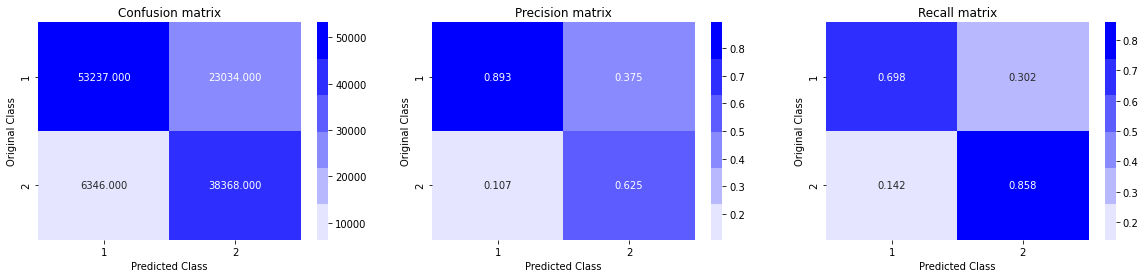

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

alpha = np.random.uniform(0.00005,0.00035,7)
alpha = np.round(alpha,7)
alpha.sort()

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_final, y_train_final)
    predict_y = sig_clf.predict_proba(X_test_final)
    log_error_array.append(log_loss(y_test_final, predict_y, eps=1e-15))
    #print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train_final)

predict_y_train_log_loss = sig_clf.predict_proba(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_final, predict_y_train_log_loss,eps=1e-15))
print('\n')
predict_y_test_log_loss = sig_clf.predict_proba(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_final, predict_y_test_log_loss,eps=1e-15))
predicted_y =np.argmax(predict_y_test_log_loss,axis=1) # from the whole column of predicted_y picking the highest value
print('\n--------------------------------------------------------------------------------------------------------------------------------\n')
predict_y_train_accuracy = sig_clf.predict(X_train_final)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train_final, predict_y_train_accuracy, normalize=True, sample_weight=None))
print('\n')
predict_y_test_accuracy = sig_clf.predict(X_test_final)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test_final, predict_y_test_accuracy, normalize=True, sample_weight=None))
print('\n--------------------------------------------------------------------------------------------------------------------------------\n')
print("Total number of data points in test data:", len(predicted_y))
print('\n')
print("Number of correctly classified points in test data = ", accuracy_score(y_test_final, predict_y_test_accuracy, normalize=False))
print('\n--------------------------------------------------------------------------------------------------------------------------------\n')
plot_confusion_matrix(y_test_final, predicted_y)


In [ ]:
#predict_y_test  '''while using predict_proba method. It returns probability score, not the actual label'''

array([[0.28492795, 0.71507205],
       [0.96450028, 0.03549972],
       [0.4224172 , 0.5775828 ],
       ...,
       [0.02297893, 0.97702107],
       [0.89303209, 0.10696791],
       [0.78756753, 0.21243247]])

# ***63. Testing with Random Forest Classifier Bagging(Row Sampling + Column Sampling)***

estimators = 75 , Train Log Loss = 0.36405628952583796 , Test Log Loss = 0.4482741565083662


estimators = 75 , Train accuracy = 0.8333150300587003 , Test accuracy = 0.7602264743563252

-------------------------------------------------------------------------------------------

estimators = 100 , Train Log Loss = 0.364081158622155 , Test Log Loss = 0.4512752424670658


estimators = 100 , Train accuracy = 0.8347143449258009 , Test accuracy = 0.7565648634128198

-------------------------------------------------------------------------------------------

estimators = 150 , Train Log Loss = 0.3642655651906377 , Test Log Loss = 0.44863101931269006


estimators = 150 , Train accuracy = 0.8340412567618791 , Test accuracy = 0.7572178369219325

-------------------------------------------------------------------------------------------

estimators = 200 , Train Log Loss = 0.36457575379920254 , Test Log Loss = 0.4498438404386922


estimators = 200 , Train accuracy = 0.8344876204916377 , Test accu

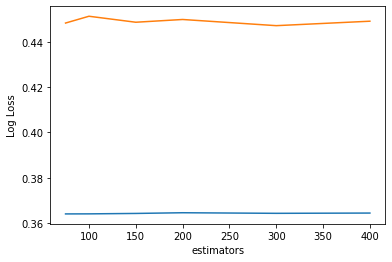

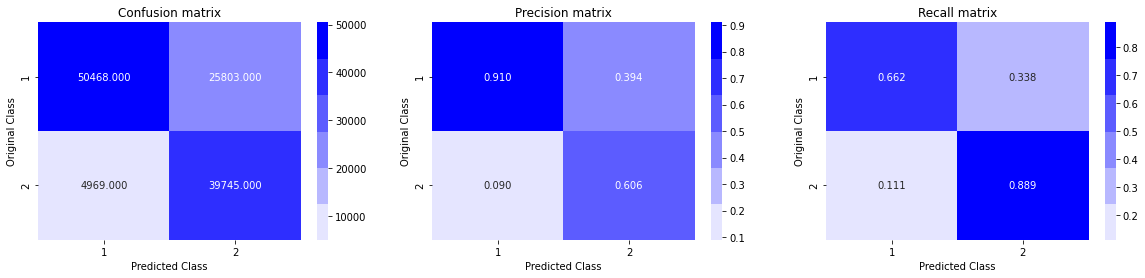

In [ ]:
# 60 mins to run
from sklearn.ensemble import RandomForestClassifier as RFC

estimators = [75,100,150,200,300,400]
test_scores = []
train_scores = []
for i in estimators:
    clf = RFC(n_estimators=i,max_depth=11,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
    clf.fit(X_train_final,y_train_final)
    predict_y_train_log_loss = clf.predict_proba(X_train_final)
    log_loss_train = log_loss(y_train_final, predict_y_train_log_loss, eps=1e-15)
    train_scores.append(log_loss_train)

    predict_y_train_accuracy = clf.predict(X_train_final)
    accuracy_train = accuracy_score(y_train_final, predict_y_train_accuracy, normalize=True, sample_weight=None)

    predict_y_test_log_loss = clf.predict_proba(X_test_final)
    log_loss_test = log_loss(y_test_final, predict_y_test_log_loss, eps=1e-15)
    test_scores.append(log_loss_test)

    predict_y_test_accuracy = clf.predict(X_test_final)
    accuracy_test = accuracy_score(y_test_final, predict_y_test_accuracy, normalize=True, sample_weight=None)

    print('estimators =',i,', Train Log Loss =',log_loss_train,', Test Log Loss =',log_loss_test)
    print('\n')
    print('estimators =',i,', Train accuracy =',accuracy_train,', Test accuracy =',accuracy_test)
    print('\n-------------------------------------------------------------------------------------------\n')
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators') 
plt.ylabel('Log Loss')
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points in test data:", len(predicted_y))
print('\n')
print("Number of correctly classified points in test data = ", accuracy_score(y_test_final, predict_y_test_accuracy, normalize=False))
print('\n----------------------------------------------------------------------------------------------\n')
plot_confusion_matrix(y_test_final, predicted_y)

# ***64. Testing with XgBoost(Gradient Boost Decision Tree)***

The train log loss is: 0.3067093284342253


The test log loss is: 0.46839509859716916

------------------------------------------------------

The train accuracy is: 0.8560370694449857


The test accuracy is: 0.7342811092284167

------------------------------------------------------

Total number of data points in test data: 120985


Number of correctly classified points in test data =  88837

----------------------------------------------------------------------------------------------



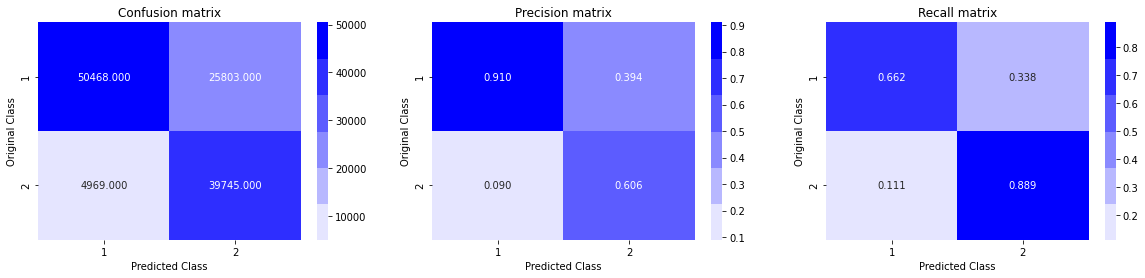

In [ ]:
# 1 hr 18 mins to run
import xgboost as xgb
#clf = xgb.XGBClassifier(max_depth=10, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8)
clf = xgb.XGBClassifier(max_depth=8, n_estimators=400, learning_rate=0.02, colsample_bytree=.9, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.9)
clf.fit(X_train_final,y_train_final)

predict_y_train_log_loss = clf.predict_proba(X_train_final)
print("The train log loss is:",log_loss(y_train_final, predict_y_train_log_loss, eps=1e-15))
print('\n')
predict_y_test_log_loss = clf.predict_proba(X_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y_test_log_loss, eps=1e-15))
print('\n------------------------------------------------------\n')
predict_y_train_accuracy = clf.predict(X_train_final)
print("The train accuracy is:",accuracy_score(y_train_final, predict_y_train_accuracy, normalize=True, sample_weight=None))
print('\n')
predict_y_test_accuracy = clf.predict(X_test_final)
print("The test accuracy is:",accuracy_score(y_test_final, predict_y_test_accuracy, normalize=True, sample_weight=None))
print('\n------------------------------------------------------\n')
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points in test data:", len(predicted_y))
print('\n')
print("Number of correctly classified points in test data = ", accuracy_score(y_test_final, predict_y_test_accuracy, normalize=False))
print('\n----------------------------------------------------------------------------------------------\n')
plot_confusion_matrix(y_test_final, predicted_y)

# ***65. Testing with Stacking Classifier mlextend***

The train log loss is: 0.3337574162829578


The test log loss is: 0.46296628046467

------------------------------------------------------

The train accuracy is: 0.8320751308093708


The test accuracy is: 0.7595156424350126

------------------------------------------------------

Total number of data points in test data: 120985


Number of correctly classified points in test data =  91890

----------------------------------------------------------------------------------------------



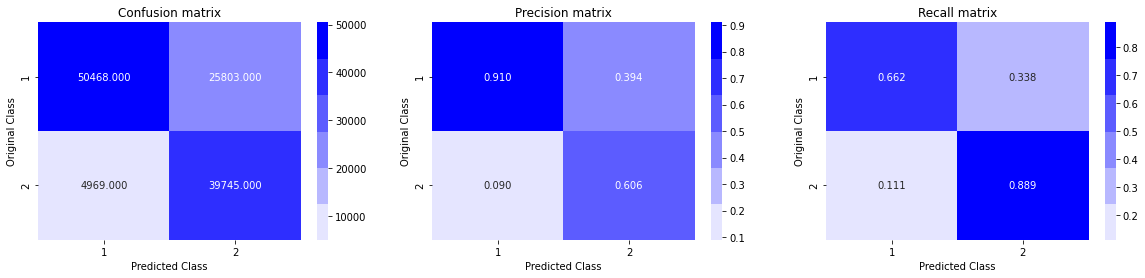

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=11, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('sgdc', (SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(max_depth=10,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85))
clf.fit(X_train_final, y_train_final)

predict_y_train_log_loss = clf.predict_proba(X_train_final)
print("The train log loss is:",log_loss(y_train_final, predict_y_train_log_loss, eps=1e-15))
print('\n')
predict_y_test_log_loss = clf.predict_proba(X_test_final)
print("The test log loss is:",log_loss(y_test_final, predict_y_test_log_loss, eps=1e-15))
print('\n------------------------------------------------------\n')
predict_y_train_accuracy = clf.predict(X_train_final)
print("The train accuracy is:",accuracy_score(y_train_final, predict_y_train_accuracy, normalize=True, sample_weight=None))
print('\n')
predict_y_test_accuracy = clf.predict(X_test_final)
print("The test accuracy is:",accuracy_score(y_test_final, predict_y_test_accuracy, normalize=True, sample_weight=None))
print('\n------------------------------------------------------\n')
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points in test data:", len(predicted_y))
print('\n')
print("Number of correctly classified points in test data = ", accuracy_score(y_test_final, predict_y_test_accuracy, normalize=False))
print('\n----------------------------------------------------------------------------------------------\n')
plot_confusion_matrix(y_test_final, predicted_y)

# ***66. Taking real life example and testing how it is performing***

In [ ]:
df_test = pd.read_csv('test.csv')
df_test.head(20)

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?
5,5,How are the two wheeler insurance from Bharti ...,I admire I am considering of buying insurance ...
6,6,How can I reduce my belly fat through a diet?,How can I reduce my lower belly fat in one month?
7,7,"By scrapping the 500 and 1000 rupee notes, how...",How will the recent move to declare 500 and 10...
8,8,What are the how best books of all time?,What are some of the military history books of...
9,9,After 12th years old boy and I had sex with a ...,Can a 14 old guy date a 12 year old girl?


In [ ]:
df = {'id': [0,1,2], 'qid1': [1,3,5], 'qid2': [2,4,6], 'question1': ['How can milk be stored at room temperature?', 'What are the benefits of 8GB RAM over 4GB RAM?', 'How do I get an internship in ISRO?'], 
      'question2': ['Which flavour of cornflakes goes best with milk?', 'Which is better for gaming: i3 with 4GB or 8GB RAM?', 'How do I apply for a summer internship in ISRO?' ]}
df = pd.DataFrame(df) 
df_hold_i=df
df.head()

,id,qid1,qid2,question1,question2
0,0,1,2,How can milk be stored at room temperature?,Which flavour of cornflakes goes best with milk?
1,1,3,4,What are the benefits of 8GB RAM over 4GB RAM?,Which is better for gaming: i3 with 4GB or 8GB...
2,2,5,6,How do I get an internship in ISRO?,How do I apply for a summer internship in ISRO?


In [ ]:
df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count') 
df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])
df['len_q1'] = df.question1.apply(lambda x: len(str(x)))
df['len_q2'] = df.question2.apply(lambda x: len(str(x)))
df['diff_len'] = df.len_q1 - df.len_q2
df['len_char_q1'] = df.question1.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
df['len_char_q2'] = df.question2.apply(lambda x: len(''.join(set(str(x).replace(' ', '')))))
df['len_word_q1'] = df.question1.apply(lambda x: len(str(x).split()))
df['len_word_q2'] = df.question2.apply(lambda x: len(str(x).split()))
df['common_words'] = df.apply(lambda x: len(set(str(x['question1']).lower().split()).intersection(set(str(x['question2']).lower().split()))), axis=1)

def word_Total(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * (len(w1) + len(w2))
df['total_words'] = df.apply(word_Total, axis=1)

def word_share(row):
  w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
  return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

df['words_share'] = df.apply(word_share, axis=1)
df['fuzz_qratio'] = df.apply(lambda x: fuzz.QRatio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_WRatio'] = df.apply(lambda x: fuzz.WRatio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_ratio'] = df.apply(lambda x: fuzz.partial_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_token_set_ratio'] = df.apply(lambda x: fuzz.partial_token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_partial_token_sort_ratio'] = df.apply(lambda x: fuzz.partial_token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_token_set_ratio'] = df.apply(lambda x: fuzz.token_set_ratio(str(x['question1']), str(x['question2'])), axis=1)
df['fuzz_token_sort_ratio'] = df.apply(lambda x: fuzz.token_sort_ratio(str(x['question1']), str(x['question2'])), axis=1)

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
#df = 
extract_features(df)


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,1,2,0,43,48,-5,19,21,8,8,0,16.0,0.000000,36,38,37,100,41,40,38,0.113636,0.199996,0.249994,0.000000,0.000000,0.124998,0.124998,0,0,0,8.0
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,2,0,46,51,-5,21,26,10,11,3,21.0,0.142857,48,55,49,100,56,58,57,0.170213,0.499992,0.749981,0.000000,0.000000,0.272725,0.299997,0,1,1,10.5
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,2,0,35,47,-12,19,23,8,10,6,18.0,0.333333,75,85,71,100,85,89,75,0.555556,0.499988,0.666644,0.666656,0.799984,0.599994,0.749991,1,1,2,9.0


In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
df['wmd'] = df.apply(lambda x: word_mover_distance(x['question1'], x['question2']), axis=1) #'word_mover_distance' added to data columns

In [ ]:
df_temp = df[['question1','question2','wmd']]
df_temp.head()

,question1,question2,wmd
0,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,2.954303
1,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1.956362
2,how do i get an internship in isro,how do i apply for a summer internship in isro,1.994640


In [ ]:
norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
norm_model.init_sims(replace=True)
df['norm_wmd'] = df.apply(lambda x: normalized_word_mover_distance(x['question1'], x['question2']), axis=1)

In [ ]:
df_temp = df[['question1','question2','norm_wmd']]
df_temp.head()

,question1,question2,norm_wmd
0,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1.014332
1,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,0.661901
2,how do i get an internship in isro,how do i apply for a summer internship in isro,0.783801


In [ ]:
dfd = df_hold_i #only given features

dfd['question1'] = dfd['question1'].apply(lambda x: str(x))
dfd['question2'] = dfd['question2'].apply(lambda x: str(x))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts from both Question1 and Question2
questions = list(dfd['question1']) + list(dfd['question2'])

tfidf = TfidfVectorizer(lowercase=False,)
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [ ]:
import en_core_web_sm

In [ ]:
nlp = spacy.load('en_core_web_sm')

vectors1 = []
for ques1 in tqdm(list(dfd['question1'])):
    docu1 = nlp(ques1) 
    mean_vector1 = np.zeros([len(docu1), len(docu1[0].vector)])
    for words1 in docu1:
        vector1 = words1.vector
        try:
            idf = word2tfidf[str(words1)]
        except:
            idf = 0
        # compute final vec
        mean_vector1 += vector1 * idf
    mean_vector1 = mean_vector1.mean(axis=0)
    vectors1.append(mean_vector1)
dfd['q1_vecs'] = list(vectors1)
df_q1 = pd.DataFrame(dfd.q1_vecs.values.tolist(), index= df.index)

100%|██████████| 3/3 [00:00<00:00, 78.27it/s]


In [ ]:
vectors2 = []
for ques2 in tqdm(list(dfd['question2'])):
    docu2 = nlp(ques2) 
    mean_vector2 = np.zeros([len(docu2), len(docu2[0].vector)])
    for word2 in docu2:
        vector2 = word2.vector
        try:
            idf = word2tfidf[str(word2)]
        except:
            #print word
            idf = 0
        mean_vector2 += vector2 * idf
    mean_vector2 = mean_vector2.mean(axis=0)
    vectors2.append(mean_vector2)
dfd['q2_vecs'] = list(vectors2)
df_q2 = pd.DataFrame(dfd.q2_vecs.values.tolist(), index= df.index)

100%|██████████| 3/3 [00:00<00:00, 103.87it/s]


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,q1_vecs,q2_vecs
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,1,2,0,43,48,-5,19,21,8,8,0,16.0,0.000000,36,38,37,100,41,40,38,0.113636,0.199996,0.249994,0.000000,0.000000,0.124998,0.124998,0,0,0,8.0,2.954303,1.014332,"[20.63892237842083, -0.3103671371936798, -15.1...","[-5.562594577670097, -6.01557032763958, 28.813..."
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,2,0,46,51,-5,21,26,10,11,3,21.0,0.142857,48,55,49,100,56,58,57,0.170213,0.499992,0.749981,0.000000,0.000000,0.272725,0.299997,0,1,1,10.5,1.956362,0.661901,"[-6.632553339004517, 5.327247679233551, -10.91...","[4.501705765724182, 12.352268815040588, 24.246..."
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,2,0,35,47,-12,19,23,8,10,6,18.0,0.333333,75,85,71,100,85,89,75,0.555556,0.499988,0.666644,0.666656,0.799984,0.599994,0.749991,1,1,2,9.0,1.994640,0.783801,"[1.6587354242801666, 11.775431156158447, 22.50...","[10.934767581522465, 11.754496216773987, 13.09..."


In [ ]:
df.drop(['q1_vecs', 'q2_vecs'], axis=1, inplace=True)
df.head()

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,1,2,0,43,48,-5,19,21,8,8,0,16.0,0.000000,36,38,37,100,41,40,38,0.113636,0.199996,0.249994,0.000000,0.000000,0.124998,0.124998,0,0,0,8.0,2.954303,1.014332
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,2,0,46,51,-5,21,26,10,11,3,21.0,0.142857,48,55,49,100,56,58,57,0.170213,0.499992,0.749981,0.000000,0.000000,0.272725,0.299997,0,1,1,10.5,1.956362,0.661901
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,2,0,35,47,-12,19,23,8,10,6,18.0,0.333333,75,85,71,100,85,89,75,0.555556,0.499988,0.666644,0.666656,0.799984,0.599994,0.749991,1,1,2,9.0,1.994640,0.783801


In [ ]:
error_cnt = 0
q1_vecs = np.zeros((df.shape[0], 300))
for i, q in tqdm(enumerate(df.question1.values)):
    q1_vecs[i, :] = sentence_to_vector(q)

q2_vecs  = np.zeros((df.shape[0], 300))
for i, q in tqdm(enumerate(df.question2.values)):
    q2_vecs[i, :] = sentence_to_vector(q)

3it [00:00, 425.30it/s]
3it [00:00, 3009.55it/s]


In [ ]:
df['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(q1_vecs), np.nan_to_num(q2_vecs))]

df['skew_q1vec'] = [skew(x) for x in np.nan_to_num(q1_vecs)]
df['skew_q2vec'] = [skew(x) for x in np.nan_to_num(q2_vecs)]
df['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(q1_vecs)]
df['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(q2_vecs)]

In [ ]:
df_q1['id']=df['id'] #Incorporatind id column in df3_q1 from df1 for joining purpose. This column will be used to join them
df_q2['id']=df['id'] #Incorporatind id column in df3_q2 from df1 for joining purpose. This column will be used to join them
df2 = df_q1.merge(df_q2, on='id',how='left') #df3_q1 and df3_q2 joined in a single dataframe df2
final_exp_res  = df.merge(df2, on='id',how='left') #df2 and df2 joined together

In [ ]:
#final_exp_res_hold = final_exp_res
final_exp_res.head()

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,1,2,0,43,48,-5,19,21,8,8,0,16.0,0.000000,36,38,37,100,41,40,38,0.113636,0.199996,0.249994,0.000000,0.000000,0.124998,0.124998,0,0,0,8.0,2.954303,1.014332,1.048882,...,8.637275,10.715537,-0.736436,33.739998,10.756514,-1.093396,18.398800,-11.850585,5.583600,9.720832,6.523701,-21.692234,12.191737,10.286435,1.411466,4.002638,19.779614,5.258696,-13.915105,7.147558,23.122220,-42.700747,12.170374,-9.606820,-2.654294,-12.958170,-18.097880,1.326563,3.756902,-9.838956,3.801370,16.772524,0.385912,2.233000,1.154622,-17.924681,-3.644497,7.642425,9.732407,2.164469
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,2,0,46,51,-5,21,26,10,11,3,21.0,0.142857,48,55,49,100,56,58,57,0.170213,0.499992,0.749981,0.000000,0.000000,0.272725,0.299997,0,1,1,10.5,1.956362,0.661901,0.862774,...,-3.449613,19.759598,26.522589,-1.480295,15.223662,-4.810123,27.298906,-1.791182,22.871539,-2.769947,5.479195,-31.696403,16.370023,21.221329,-1.115496,-14.354425,23.187747,-7.407345,7.313371,-0.445692,19.037028,-11.524486,-26.208803,-11.583663,6.266636,-38.373890,-12.037376,-14.597427,15.265309,-2.840783,2.358985,20.634125,-12.366476,10.508398,-36.566936,-1.752922,4.617940,-1.450333,7.302257,19.481136
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,2,0,35,47,-12,19,23,8,10,6,18.0,0.333333,75,85,71,100,85,89,75,0.555556,0.499988,0.666644,0.666656,0.799984,0.599994,0.749991,1,1,2,9.0,1.994640,0.783801,0.600645,...,26.785861,16.341104,2.620730,-0.717130,14.561689,-23.243735,11.092265,-3.302170,-10.350703,-8.954955,0.759736,4.885609,6.513341,5.752194,-9.803123,27.639614,-4.461457,-6.122246,-16.276241,13.490429,10.639552,-17.349592,-7.164786,13.192411,-6.614805,-1.547062,-8.155779,-8.123275,2.624945,17.974700,-0.287570,-16.848032,-4.583222,5.029598,-17.152144,-16.407252,-9.087531,17.481152,0.738531,-9.164372


In [ ]:
nan_rows = final_exp_res[final_exp_res.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, freq_qid1, freq_qid2, freq_q1+q2, freq_q1-q2, len_q1, len_q2, diff_len, len_char_q1, len_char_q2, len_word_q1, len_word_q2, common_words, total_words, words_share, fuzz_qratio, fuzz_WRatio, fuzz_partial_ratio, fuzz_partial_token_set_ratio, fuzz_partial_token_sort_ratio, fuzz_token_set_ratio, fuzz_token_sort_ratio, longest_substr_ratio, cwc_max, cwc_min, csc_max, csc_min, ctc_max, ctc_min, first_word_eq, last_word_eq, abs_len_diff, mean_len, wmd, norm_wmd, euclidean_distance, minkowski_distance, cityblock_distance, cosine_distance, jaccard_distance, canberra_distance, braycurtis_distance, skew_q1vec, skew_q2vec, kur_q1vec, kur_q2vec, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 31_x, 32_x, 33_x, 34_x, 35_x, 36_x, 37_x, 38_x, 39_x, 40_x, 41_x, 42_x, 43_x, 44_x, 45_x, 46_x, 47_x, 48_x, 49_x, ...]


In [ ]:
nan_values = final_exp_res.isna()
nan_columns = nan_values.any()

columns_with_nan = final_exp_res.columns[nan_columns].tolist()
print(columns_with_nan)

[]


In [ ]:
final_exp_res_hold = final_exp_res
final_exp_res = final_exp_res.drop(['cosine_distance', 'braycurtis_distance'],axis=1)

In [ ]:
final_exp_res.head()

,id,qid1,qid2,question1,question2,freq_qid1,freq_qid2,freq_q1+q2,freq_q1-q2,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,total_words,words_share,fuzz_qratio,fuzz_WRatio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,longest_substr_ratio,cwc_max,cwc_min,csc_max,csc_min,ctc_max,ctc_min,first_word_eq,last_word_eq,abs_len_diff,mean_len,wmd,norm_wmd,euclidean_distance,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,1,2,0,43,48,-5,19,21,8,8,0,16.0,0.000000,36,38,37,100,41,40,38,0.113636,0.199996,0.249994,0.000000,0.000000,0.124998,0.124998,0,0,0,8.0,2.954303,1.014332,1.048882,...,8.637275,10.715537,-0.736436,33.739998,10.756514,-1.093396,18.398800,-11.850585,5.583600,9.720832,6.523701,-21.692234,12.191737,10.286435,1.411466,4.002638,19.779614,5.258696,-13.915105,7.147558,23.122220,-42.700747,12.170374,-9.606820,-2.654294,-12.958170,-18.097880,1.326563,3.756902,-9.838956,3.801370,16.772524,0.385912,2.233000,1.154622,-17.924681,-3.644497,7.642425,9.732407,2.164469
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,2,0,46,51,-5,21,26,10,11,3,21.0,0.142857,48,55,49,100,56,58,57,0.170213,0.499992,0.749981,0.000000,0.000000,0.272725,0.299997,0,1,1,10.5,1.956362,0.661901,0.862774,...,-3.449613,19.759598,26.522589,-1.480295,15.223662,-4.810123,27.298906,-1.791182,22.871539,-2.769947,5.479195,-31.696403,16.370023,21.221329,-1.115496,-14.354425,23.187747,-7.407345,7.313371,-0.445692,19.037028,-11.524486,-26.208803,-11.583663,6.266636,-38.373890,-12.037376,-14.597427,15.265309,-2.840783,2.358985,20.634125,-12.366476,10.508398,-36.566936,-1.752922,4.617940,-1.450333,7.302257,19.481136
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,2,0,35,47,-12,19,23,8,10,6,18.0,0.333333,75,85,71,100,85,89,75,0.555556,0.499988,0.666644,0.666656,0.799984,0.599994,0.749991,1,1,2,9.0,1.994640,0.783801,0.600645,...,26.785861,16.341104,2.620730,-0.717130,14.561689,-23.243735,11.092265,-3.302170,-10.350703,-8.954955,0.759736,4.885609,6.513341,5.752194,-9.803123,27.639614,-4.461457,-6.122246,-16.276241,13.490429,10.639552,-17.349592,-7.164786,13.192411,-6.614805,-1.547062,-8.155779,-8.123275,2.624945,17.974700,-0.287570,-16.848032,-4.583222,5.029598,-17.152144,-16.407252,-9.087531,17.481152,0.738531,-9.164372


In [ ]:
final_exp_res.drop(['id', 'qid1', 'qid2', 'question1', 'question2'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)
X_exp_final = scale.fit_transform(final_exp_res)

In [ ]:
final_train_data = pd.read_csv("/content/drive/My Drive/Project 4th year/QUORA VIDEO/quora_all_features_train.csv")

y_train_final = final_train_data['is_duplicate']
y_train_final = list(map(int, y_train_final.values))
final_train_data_hold = final_train_data
final_train_data.drop(['Unnamed: 0', 'id', 'is_duplicate'], axis=1, inplace=True)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler(with_mean=False)
X_train_final = scale.fit_transform(final_train_data)

***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

clf = SGDClassifier(alpha=0.0003335, penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_final, y_train_final)

predict_y_exp_accuracy = sig_clf.predict(X_exp_final)
predict_y_exp_prob = sig_clf.predict_proba(X_exp_final)

In [ ]:
df_hold = df_hold_i[['id', 'qid1', 'qid2', 'question1', 'question2']]
df_hold.head()

,id,qid1,qid2,question1,question2
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro


In [ ]:
predict_y_exp_accuracy

array([1, 1, 1])

In [ ]:
predict_y_exp_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
res_logistic = pd.DataFrame(data=predict_y_exp_accuracy, columns=["res_logistic"])
res_logistic['id'] = df_hold['id']
res = df_hold.merge(res_logistic, on='id',how='left')

In [ ]:
res.head()

,id,qid1,qid2,question1,question2,res_logistic
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1


***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(n_estimators=75,max_depth=11,n_jobs=-1)#low bias high variance model, as depth increases variance increases. while bagging the variance will come down automatically in fact very low. n_jobs=-1 to parallalize the task into cpu cores
    #class_weight={0: 1, 1: 1.75}
clf.fit(X_train_final,y_train_final)

predict_y_exp_accuracy = clf.predict(X_exp_final)
predict_y_exp_prob = clf.predict_proba(X_exp_final)

In [ ]:
df_hold.head()

,id,qid1,qid2,question1,question2
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro


In [ ]:
predict_y_exp_accuracy

array([0, 1, 1])

In [ ]:
res_RandomForest = pd.DataFrame(data=predict_y_exp_accuracy, columns=["res_RF"])
res_RandomForest['id'] = res['id']
res = res.merge(res_RandomForest, on='id',how='left')
res.head()

,id,qid1,qid2,question1,question2,res_logistic,res_RF
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,0
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1


***Observe that Logistic Regression classified the 1st Q pair as duplicate, which is wrong but Random Forest classified it properly as non-duplicate***

***XgBoost(Gradient Boost Decision Tree)***

In [ ]:
# 80 mins to run
import xgboost as xgb
clf = xgb.XGBClassifier(max_depth=8, n_estimators=400, learning_rate=0.02, colsample_bytree=.9, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.9)
clf.fit(X_train_final,y_train_final)

predict_y_exp_accuracy = clf.predict(X_exp_final)
predict_y_exp_prob = clf.predict_proba(X_exp_final)

In [ ]:
df_hold.head()

,id,qid1,qid2,question1,question2
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro


In [ ]:
predict_y_exp_accuracy

array([0, 1, 1])

In [ ]:
res_XgBoost = pd.DataFrame(data=predict_y_exp_accuracy, columns=["res_GBDTXgBoost"])
res_XgBoost['id'] = res['id']
res = res.merge(res_XgBoost, on='id',how='left')
res.head()

,id,qid1,qid2,question1,question2,res_logistic,res_RF,res_GBDTXgBoost
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,0,0
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,1
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,1


***Stacking Classifier mlextend***

In [ ]:
# 35 mins to run
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
import xgboost as xgb

estimators = [('rf', RandomForestClassifier(n_estimators=70, max_depth=11, random_state=42)), ('sgc', SGDClassifier(alpha=10**(-5), penalty='l2', loss='hinge', random_state=42)), ('sgdc', (SGDClassifier(alpha=10**(-5), penalty='l2', loss='log', random_state=42)))]
clf = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(max_depth=10,learning_rate=0.02,n_estimators=400,n_jobs=-1, subsample=0.85, colsample_bytree=0.85))
clf.fit(X_train_final, y_train_final)

predict_y_exp_accuracy = clf.predict(X_exp_final)
predict_y_exp_prob = clf.predict_proba(X_exp_final)

In [ ]:
df_hold.head()

,id,qid1,qid2,question1,question2
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro


In [ ]:
predict_y_exp_accuracy

array([0, 1, 1])

In [ ]:
res_StackingCl = pd.DataFrame(data=predict_y_exp_accuracy, columns=["res_StackingCl"])
res_StackingCl['id'] = res['id']
res = res.merge(res_StackingCl, on='id',how='left')
res.head()

,id,qid1,qid2,question1,question2,res_logistic,res_RF,res_GBDTXgBoost,res_StackingCl
0,0,1,2,how can milk be stored at room temperature,which flavour of cornflakes goes best with milk,1,0,0,0
1,1,3,4,what are the benefits of 8gb ram over 4gb ram,which is better for gaming i3 with 4gb or 8gb...,1,1,1,1
2,2,5,6,how do i get an internship in isro,how do i apply for a summer internship in isro,1,1,1,1


***So, we can see Random Forest, Gradient Boost Decision tree(XgBoost), Stacking Classifier(MlXtend) working pretty well in classifying the Q pairs. The 2nd pair is actually not duplicate, but it's very close since they have almost 80% words in common. Our aim will be improve our model such that it can detect this kind of pairs also.***